In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Read All data files

In [36]:
target_data = pd.read_csv('data/Train-1542865627584.csv')
tr_data_beneficiary = pd.read_csv('data/Train_Beneficiarydata-1542865627584.csv')
tr_data_inpatient = pd.read_csv('data/Train_Inpatientdata-1542865627584.csv')
tr_data_outpatient = pd.read_csv('data/Train_Outpatientdata-1542865627584.csv')

print("target_data : ",target_data.shape)
print("train_data_beneficiary : ",tr_data_beneficiary.shape)
print("train_data_inpatient : ",tr_data_inpatient.shape)
print("tr_data_outpatient : ",tr_data_outpatient.shape)

target_data :  (5410, 2)
train_data_beneficiary :  (138556, 25)
train_data_inpatient :  (40474, 30)
tr_data_outpatient :  (517737, 27)


# Exploratory Data Analysis

# 1. Most comman procedure and dignosis code 

# Inpatient

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit  diagnosis code.

In [37]:
#check all the columns of the Inpateint dataset and top 5 data points
print('Columns in this dataset are : ')
print(tr_data_inpatient.columns)

tr_data_inpatient.head(5)

Columns in this dataset are : 
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


### Inpatient - Procedure codes

In [38]:
#create a dataframe for concatinating all Procedure Code columns  

inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([tr_data_inpatient["ClmProcedureCode_1"], 
                                           tr_data_inpatient["ClmProcedureCode_2"],
                                           tr_data_inpatient["ClmProcedureCode_3"],
                                           tr_data_inpatient["ClmProcedureCode_4"], 
                                           tr_data_inpatient["ClmProcedureCode_5"], 
                                           tr_data_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

(29692, 1)


In [410]:
def analyse_cat_columns(dataset,col_to_analyse='' , 
                        prefix = '',title = 'Distribution in percentage ',
                        top_val = 30, 
                        y_lim = np.arange(0,8),
                        color ='blue'):
    """This functiom plot bar graog for categorical column"""
    #get top 30 procedure codes with its count
    val_counts_ = dataset[col_to_analyse].value_counts()
    
    
    #store this information in dataframe
    #sore counts in count columm and values in a new column
    
    val_counts_df = val_counts_.to_frame() #store this information in dataframe
    val_counts_df.columns = ['count'] 
    val_counts_df[col_to_analyse] = val_counts_df.index
    
    #since simply plotting bar plots for count of each val would not give much information,so it better to plot in percentage.
    val_counts_df[col_to_analyse] = prefix + val_counts_df[col_to_analyse].astype(str)
    val_counts_df['Percentage'] = (val_counts_df['count']/sum(val_counts_df['count']))*100
    
    val_counts_df = val_counts_df.head(top_val)
    
    val_counts_df.plot(x =col_to_analyse, y='Percentage', kind='bar', color = color, \
                        title=title, figsize=(15,5),yticks = y_lim ,grid = True )

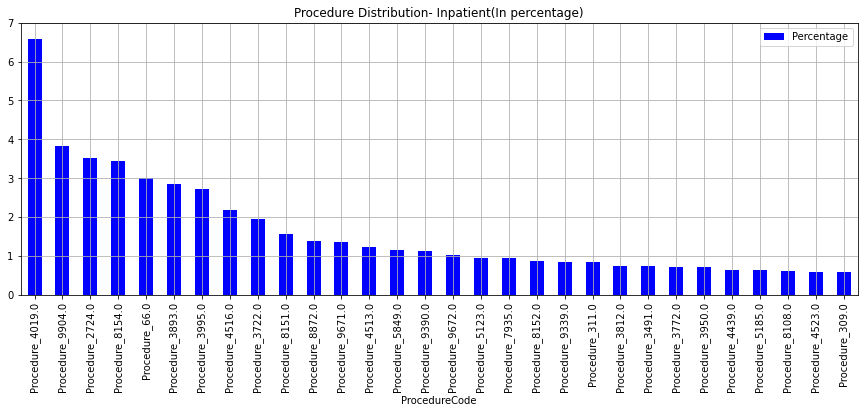

In [411]:
analyse_cat_columns(inpatient_df,col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val = 30)


<h2>Conclusion</h2>
<h4> # Inpatient - Procedure code</h4>
<ol>
<li><p>Procedure code 4019 is the most common procedure that is followed.</p></li>
<li><p>Around 6.6% patients have undergone procedure code 4019.</p></li>
<li><p>Procedure code 4019,9904,2724,8154 and 66 are top 5 procedure code for inpatient data.</p></li>    
</ol>


###  Inpatient - Diagnosis codes

In [412]:
#create a dataframe for concatinating all DiagnosisCode Code columns  

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([tr_data_inpatient["ClmDiagnosisCode_1"], 
                                           tr_data_inpatient["ClmDiagnosisCode_2"], 
                                           tr_data_inpatient["ClmDiagnosisCode_3"], 
                                           tr_data_inpatient["ClmDiagnosisCode_4"],
                                           tr_data_inpatient["ClmDiagnosisCode_5"], 
                                           tr_data_inpatient["ClmDiagnosisCode_6"],
                                           tr_data_inpatient["ClmDiagnosisCode_7"],
                                           tr_data_inpatient["ClmDiagnosisCode_8"],
                                           tr_data_inpatient["ClmDiagnosisCode_9"],
                                           tr_data_inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

(327328, 1)


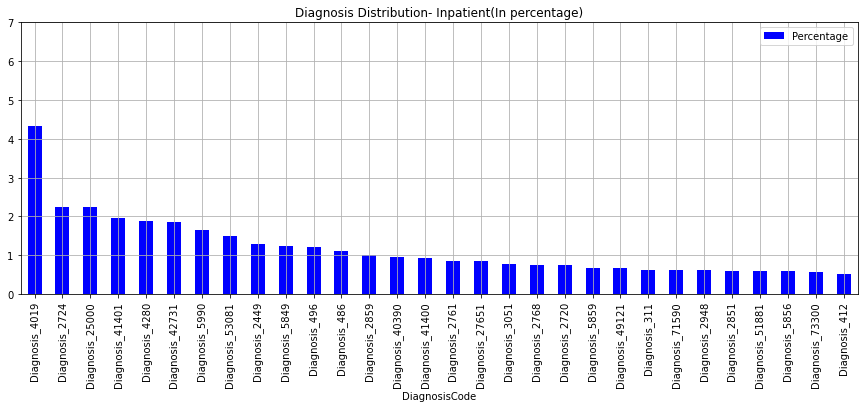

In [413]:
analyse_cat_columns(inpatient_df,col_to_analyse='DiagnosisCode' , 
                    prefix = 'Diagnosis_',
                    title = 'Diagnosis Distribution- Inpatient(In percentage)',
                    top_val = 30, color ='blue')

<h2>Conclusion</h2>
<h4> # Inpatient - Diagnosis code</h4>
<ol>
<li><p>Diagnosis code 4019 is the most common Diagnosis a patinet undergo.</p></li>
<li><p>Around 4.5% patients have undergone Diagnosis code 4019.</p></li>
<li><p>Diagnosis code 4019,2724,25000,41401 and 4280 are top 5 Diagnosis code for inpatient data.</p></li>    </ol>


# Outpatient

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

In [445]:
#check all the columns of the Outpateint dataset and top 5 data points
print('Columns in this dataset are : ')
print(tr_data_outpatient.columns)

tr_data_outpatient.head(5)

Columns in this dataset are : 
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### Outpatient - Procedure codes

In [446]:
#create a dataframe for concatinating all Procedure Code columns  

outpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
outpatient_df['ProcedureCode'] = pd.concat([tr_data_outpatient["ClmProcedureCode_1"], 
                                           tr_data_outpatient["ClmProcedureCode_2"],
                                           tr_data_outpatient["ClmProcedureCode_3"],
                                           tr_data_outpatient["ClmProcedureCode_4"], 
                                           tr_data_outpatient["ClmProcedureCode_5"], 
                                           tr_data_outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(outpatient_df.shape)

(204, 1)


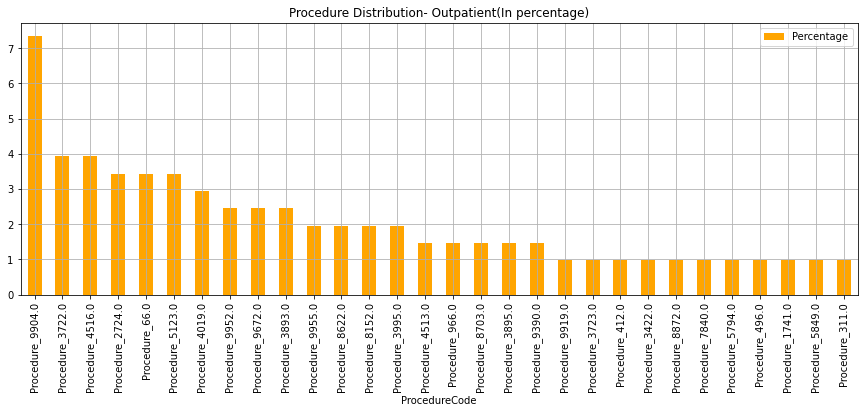

In [447]:
analyse_cat_columns(outpatient_df,col_to_analyse='ProcedureCode' , 
                    prefix = 'Procedure_',title = 'Procedure Distribution- Outpatient(In percentage)',
                    top_val = 30,color ='orange')


<h2>Conclusion</h2>
<h4> # Outpatient - Procedure code</h4>
<ol>
<li><p>Procedure code 9904 is the most common procedure that is followed.</p></li>
<li><p>Around 7.5% patients have undergone procedure code 9904.</p></li>
<li><p>Procedure code 9904,3722,4516,2724 and 66 are top 5 procedure code for inpatient data.</p></li>    
</ol>


### Outpatient - Diagnosis codes

In [448]:
#create a dataframe for concatinating all DiagnosisCode Code columns  

outpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
outpatient_df['DiagnosisCode'] = pd.concat([tr_data_outpatient["ClmDiagnosisCode_1"], 
                                           tr_data_outpatient["ClmDiagnosisCode_2"], 
                                           tr_data_outpatient["ClmDiagnosisCode_3"], 
                                           tr_data_outpatient["ClmDiagnosisCode_4"],
                                           tr_data_outpatient["ClmDiagnosisCode_5"], 
                                           tr_data_outpatient["ClmDiagnosisCode_6"],
                                           tr_data_outpatient["ClmDiagnosisCode_7"],
                                           tr_data_outpatient["ClmDiagnosisCode_8"],
                                           tr_data_outpatient["ClmDiagnosisCode_9"],
                                           tr_data_outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
print(outpatient_df.shape)

(1353388, 1)


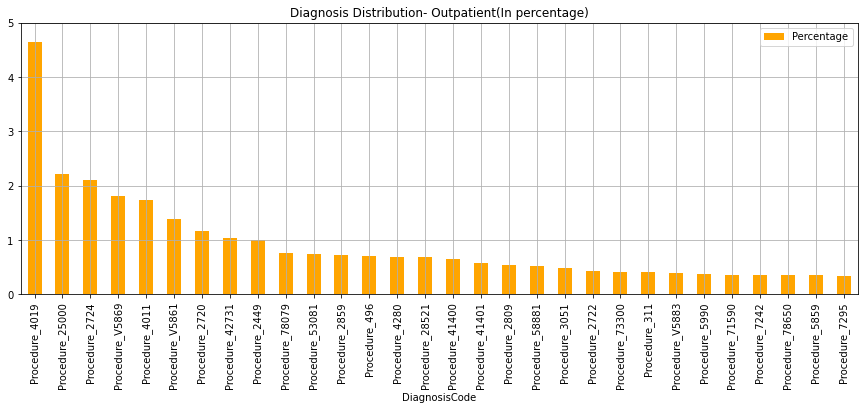

In [449]:
analyse_cat_columns(outpatient_df,col_to_analyse='DiagnosisCode' , 
                    prefix = 'Procedure_',title = 'Diagnosis Distribution- Outpatient(In percentage)',
                    top_val = 30,color ='orange',
                    y_lim = np.arange(0,6))

<h2>Conclusion</h2>
<h4> # Outpatient - Diagnosis code</h4>
<ol>
<li><p>Diagnosis code 4019 is the most common Diagnosis a patinet undergo.</p></li>
<li><p>Around 4.8% patients have undergone Diagnosis code 4019.</p></li>
<li><p>Diagnosis code 4019,25000,2724,V5869 and 401 are top 5 Diagnosis code for inpatient data.</p></li>    </ol>


# 2. Dates 

In [414]:
def get_year(date):
    """This function returns year from date"""
    date = str(date)
    return(int(date[:4]))

def get_month(date):
    """This function returns month from date"""
    date = str(date)
    return (int(date[5:7]))

def analyse_date_columns(data_frame, start_date_col, end_date_col , palette='coolwarm'):
    
    date_df = pd.DataFrame(columns = ['start_month','start_year','end_month','end_year' ])
    
    date_df['start_month'] = data_frame[start_date_col].apply(get_month)
    date_df['start_year'] = data_frame[start_date_col].apply(get_year)
    date_df['end_month'] = data_frame[end_date_col].apply(get_month)
    date_df['end_year'] = data_frame[end_date_col].apply(get_year)
    
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    data_frame[start_date_col].apply(get_year).value_counts().plot(kind='bar',title='start date')
    
    plt.subplot(122)
    data_frame[end_date_col].apply(get_year).value_counts().plot(kind='bar', title='end date')


    fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,5)) 

    sns.countplot(x='start_month',data=date_df,hue='start_year',palette=palette , ax = axes[0])
    axes[0].set_title("Plot to Analyse behaviour of data point acc to month and year")

    sns.countplot(x='end_month',data=date_df,hue='end_year',palette=palette ,  ax = axes[1])
    axes[1].set_title("Plot to Analyse behaviour of data point acc to month and year ")
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,5)) 

    sns.stripplot(x='start_month',y="start_year", data=date_df, orient = 'h' , ax = axes[0])
    axes[0].set_title("Plot to Analyse behaviour of data point acc to month and year ")

    sns.stripplot(x='end_month',y="end_year", data=date_df, orient = 'h' , ax = axes[1])
    axes[1].set_title("Plot to Analyse behaviour of data point acc to month and year ")

    plt.tight_layout()


# Inpatient 

### Inpatient - Claim start and end date

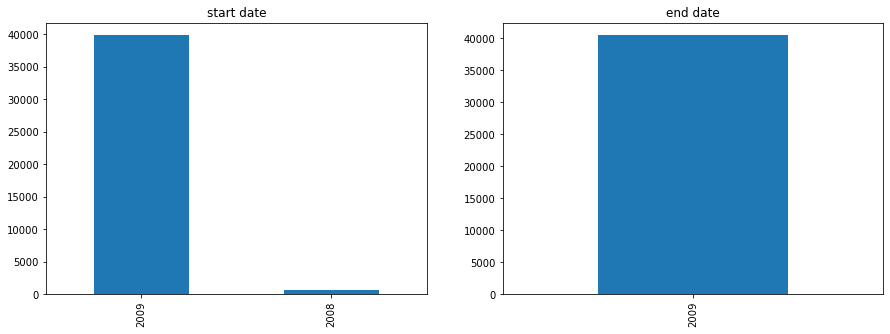

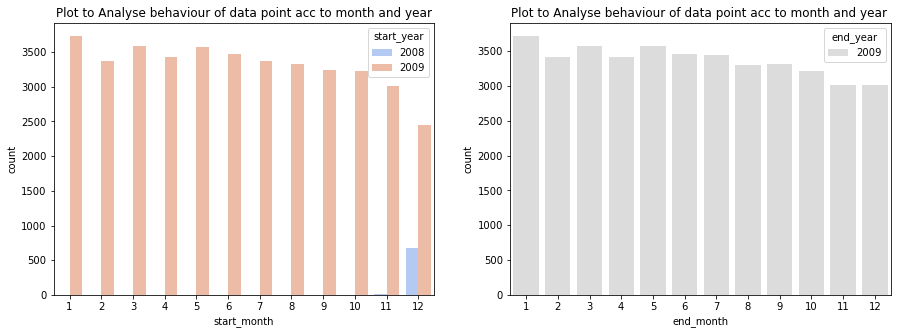

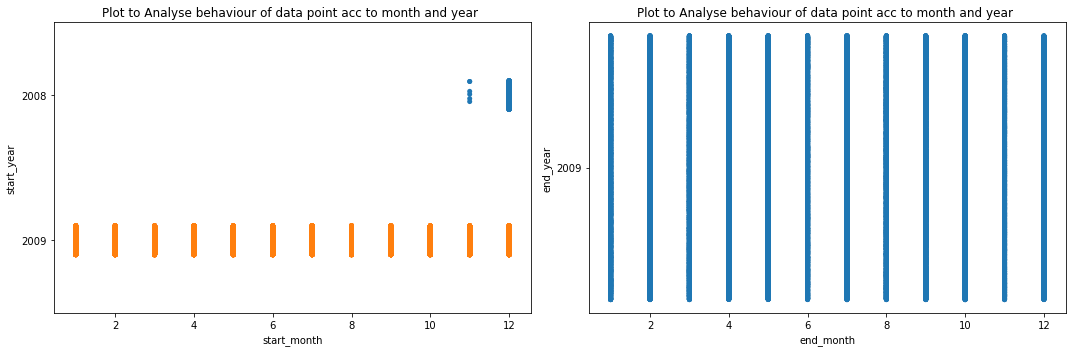

In [415]:
analyse_date_columns(tr_data_inpatient,'ClaimStartDt', 'ClaimEndDt')

<h2>Conclusion</h2>
<h4> # Inpatient -  Claim start and end date </h4>
<ol>
<li><p>Inpatient datset contains records for the claims that was submitted in the year 2009(mostly) and 2008.</li>
<li><p>All most all the claims were submitted in the year 2009.Very few were submitted in 2008.</p></li>
<li><p>In 2008 all the claims were submitted in the month of November(very few) and December(mostly) only.</p></li>
<li>In 2019 claims are submitted throughout the year,we observe slightly highest number of claims submission in the January 2009</li>
<li>All the claims are settled in 2009 and throughout the year. we observe tlightly highest number of claims settelement in January 2009  </li>


### Inpatient - Patient admit and discharge date

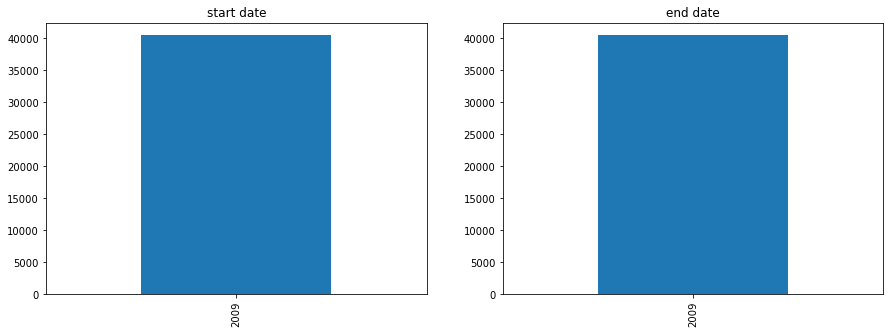

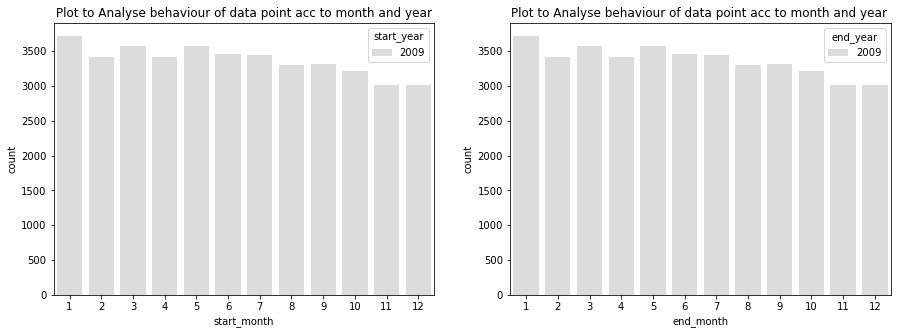

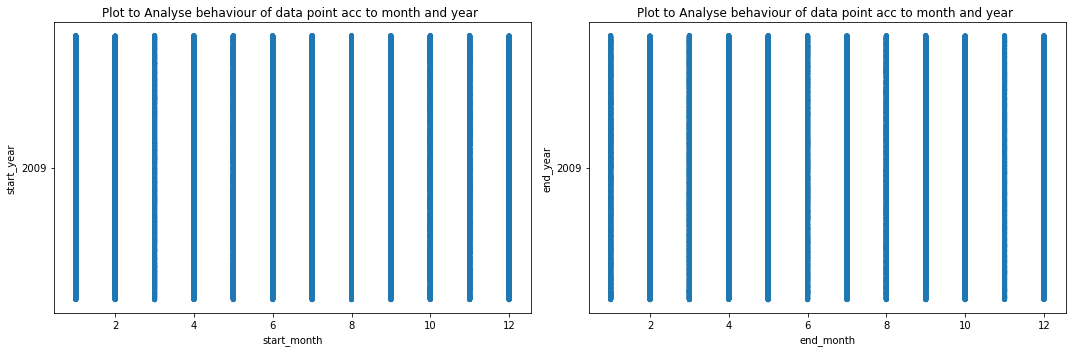

In [416]:
analyse_date_columns(tr_data_inpatient,'DischargeDt', 'DischargeDt')

<h2>Conclusion</h2>
<h4> # Inpatient - Patient admit and discharge date </h4>
<ol>
<li><p>Inpatient datset contains records for the patients who were admitted and got discharged in the year 2008 and 2009.</li>
<li><p>Patients are getting admited and discharged throughout the month.No major differnece or change in pattern in number of patients getting admitted or discharged in any particular month</p></li>

# Outpatient

### Outpatient - Claim start and end date 

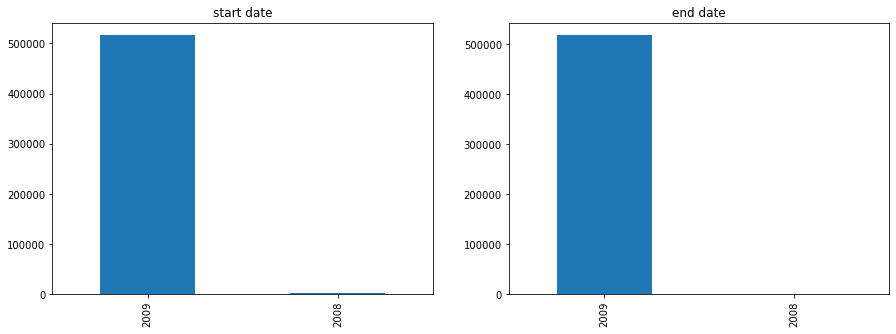

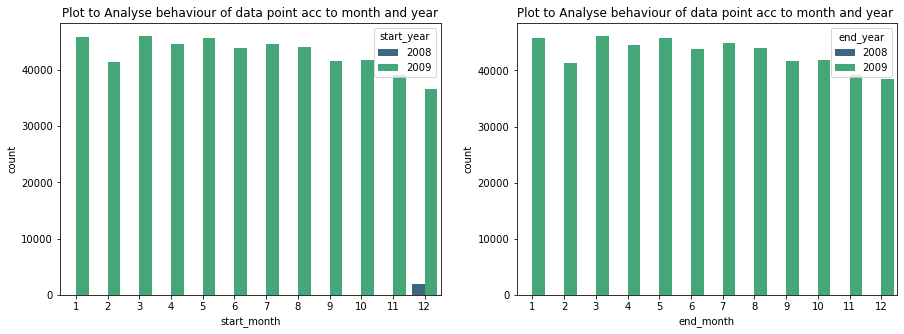

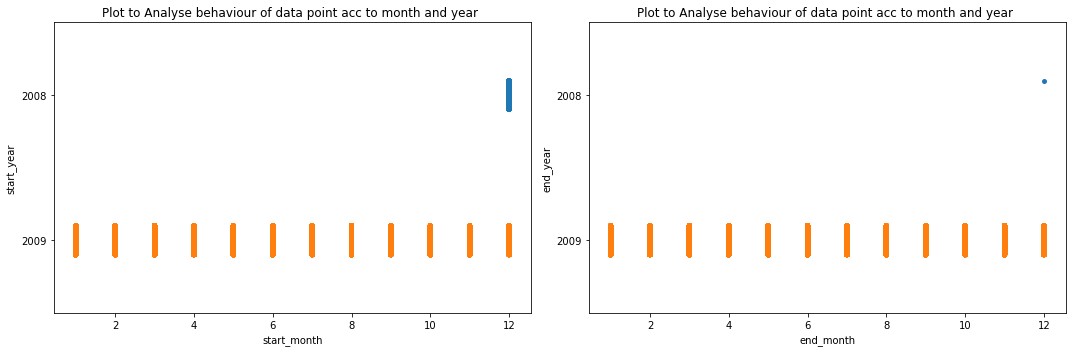

In [450]:
analyse_date_columns(tr_data_outpatient,'ClaimStartDt', 'ClaimEndDt', palette='viridis')

<h2>Conclusion</h2>
<h4> # Outpatient - Claim start and end date </h4>
<ol>
<li><p>Outpatient datset contains records for the claims that was submitted in the year 2009(mostly) and 2008.</li>
<li><p>All most all claims were submitted in the year 2009.Very few were submitted in 2008.</p></li>
<li><p>In 2008 all the claims were submitted in the month of December only.</p></li>
<li>In 2019 claims are submitted throughout the year,we observe slightly highest number of claims submission in the January,March,May of 2009</li>
<li>All the claims are settled in 2009 and throughout the year. Very Very few claims were settled in the yer 2008 and that too in the month on December.</li>


# 3. Physicians

# Inpatient

### Inpatient - Attending Physician

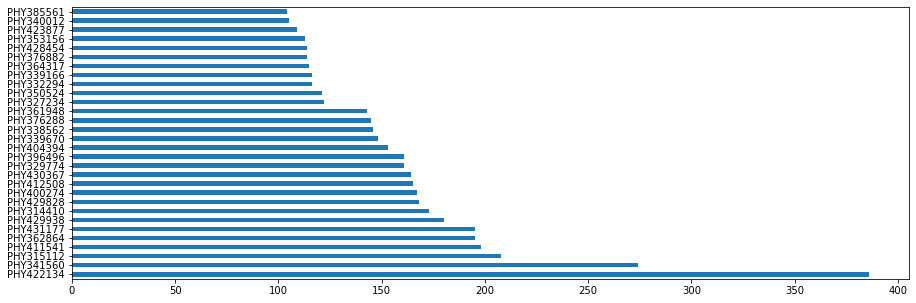

In [417]:
plt.figure(figsize=(15, 5))
tr_data_inpatient.AttendingPhysician.value_counts().head(30).plot( x=tr_data_inpatient.AttendingPhysician , kind = 'barh')

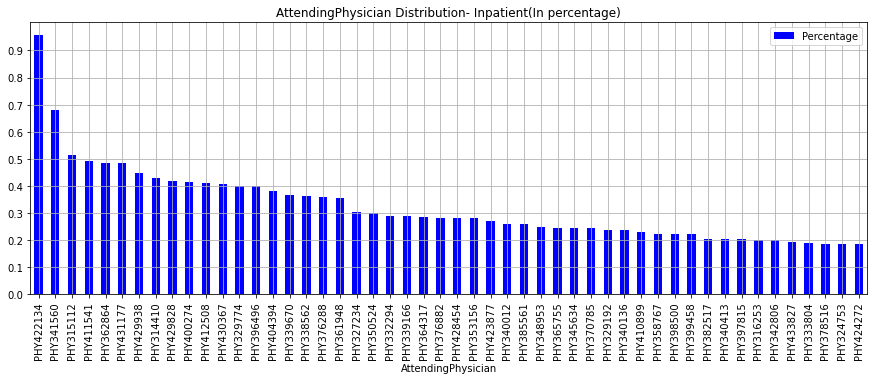

In [418]:
analyse_cat_columns(tr_data_inpatient,
                    col_to_analyse='AttendingPhysician' , 
                    prefix = '',y_lim = np.arange(0,1,0.1),
                    title = 'AttendingPhysician Distribution- Inpatient(In percentage)',top_val = 50)

<h2>Conclusion</h2>
<h4> # Inpatient - Attending Physician </h4>
<ol>
<li>Most patinets are attended by pyhisican PHY422134.</li>
<li><p>Around 1% of the patients are attended by pyhisican PHY422134 </p></li>

### Inpatient - Operating Physician

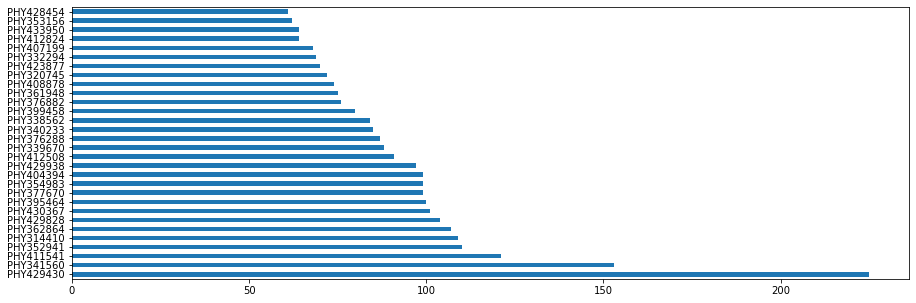

In [453]:
plt.figure(figsize=(15, 5))
tr_data_inpatient.OperatingPhysician.value_counts().head(30).plot( x=tr_data_inpatient.OperatingPhysician , kind = 'barh')

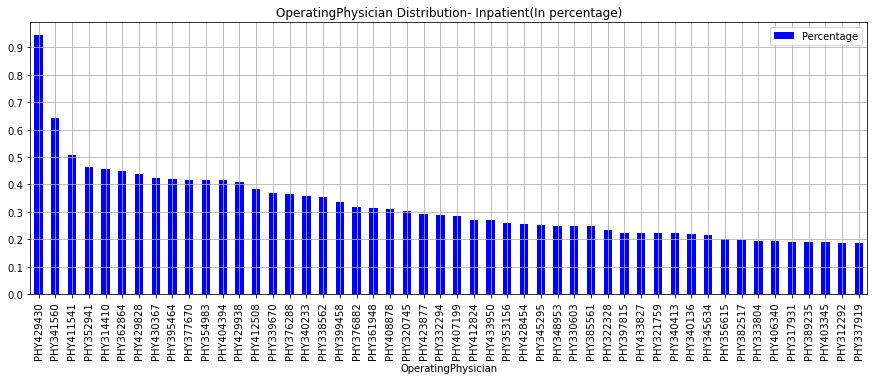

In [454]:
analyse_cat_columns(tr_data_inpatient,
                    col_to_analyse='OperatingPhysician' , 
                    prefix = '',y_lim = np.arange(0,1,0.1),
                    title = 'OperatingPhysician Distribution- Inpatient(In percentage)',top_val = 50)

<h2>Conclusion</h2>
<h4> # Inpatient  - Oprating Physician </h4>
<ol>
<li>Pyhisican PHY429430 perfoms the most of the operations.</li>
<li>Around 1% of the patients are attended by pyhisican PHY429430</li>

# Outpatient

### Outpatient - Attending Physician

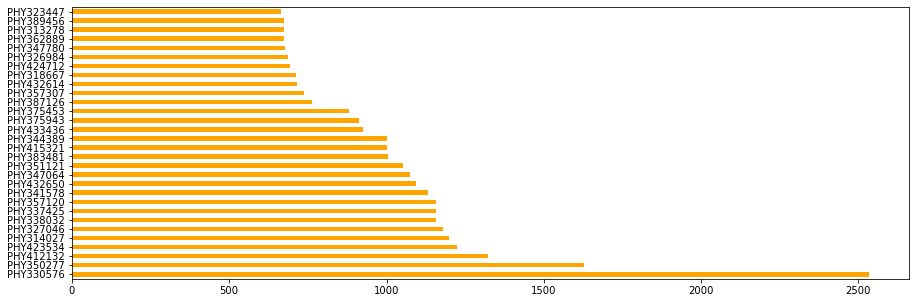

In [456]:
plt.figure(figsize=(15, 5))
tr_data_outpatient.AttendingPhysician.value_counts().head(30).plot( x=tr_data_outpatient.AttendingPhysician , kind = 'barh' , color = 'orange')

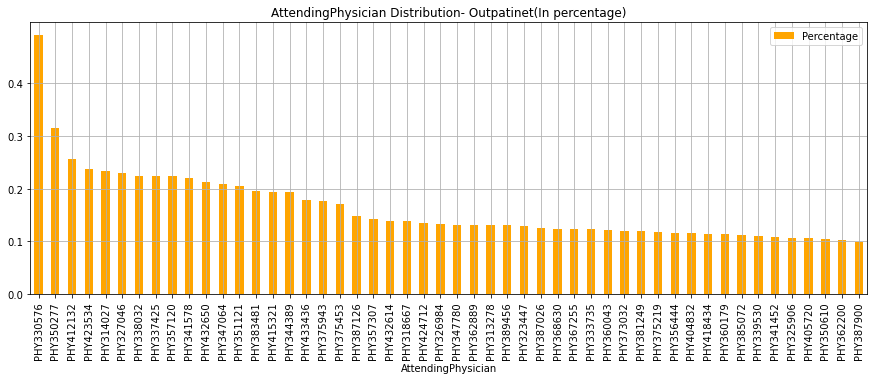

In [457]:
analyse_cat_columns(tr_data_outpatient,
                    col_to_analyse='AttendingPhysician' , 
                    prefix = '',y_lim = np.arange(0,0.5,0.1),
                    title = 'AttendingPhysician Distribution- Outpatinet(In percentage)',top_val = 50,
                    color='orange')

<h2>Conclusion</h2>
<h4> # Outpatient - Attending Physician </h4>
<ol>
<li>Most patinets are attended by pyhisican PHY330576.</li>
<li><p>Around 0.48% of the patients are attended by pyhisican PHY330576 </p></li>

### Outpatient - Operating Physician

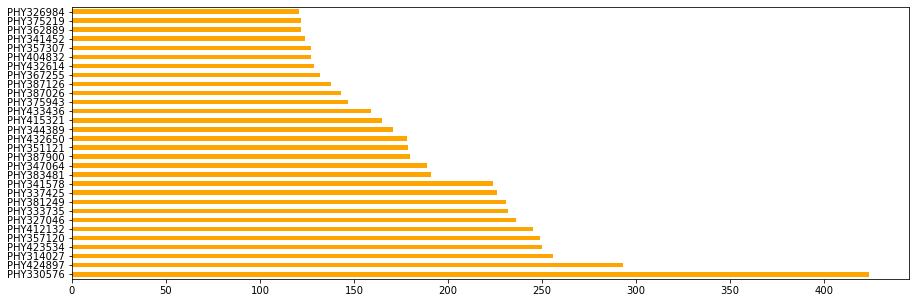

In [459]:
plt.figure(figsize=(15, 5))
tr_data_outpatient.OperatingPhysician.value_counts().head(30).plot( x=tr_data_outpatient.OperatingPhysician , kind = 'barh' , color = 'orange')

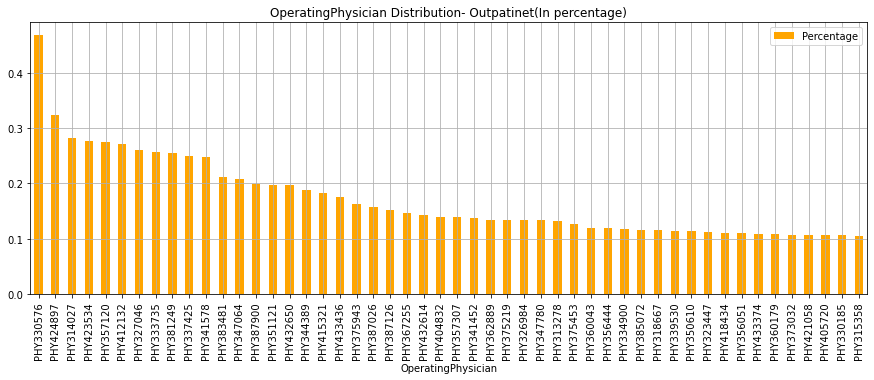

In [460]:
analyse_cat_columns(tr_data_outpatient,
                    col_to_analyse='OperatingPhysician' , 
                    prefix = '',y_lim = np.arange(0,0.5,0.1),
                    title = 'OperatingPhysician Distribution- Outpatinet(In percentage)',top_val = 50,
                    color='orange')

<h2>Conclusion</h2>
<h4> # Outpatient - Oprating Physician </h4>
<ol>
<li>Pyhisican PHY330576 perfoms the most of the operations.</li>
<li>Around 0.48% of the patients are attended by pyhisican PHY330576</li>

# 4. ClaimAmtReimbursed

# Inpatient

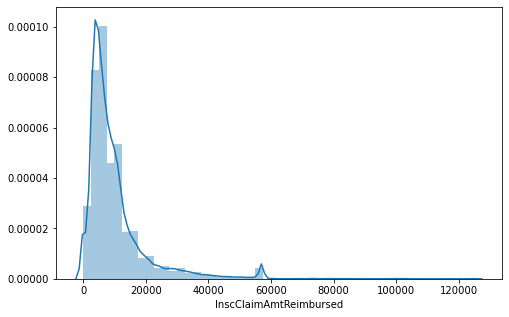

In [421]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_data_inpatient.InscClaimAmtReimbursed)

<h2>Conclusion</h2>
<h4> # Inpatient - ClaimAmt Reimbursed </h4>
<ol>
<li>Distibution of ammount that is paid as claim reimbursement seems like log normal distribtion</li>
<li>All most all Reimbursed ammount is between 0 and 20000 </li>
<li>In very few cases amount more than 20000 is paid for claim reimbursement </li>

# Outpatient

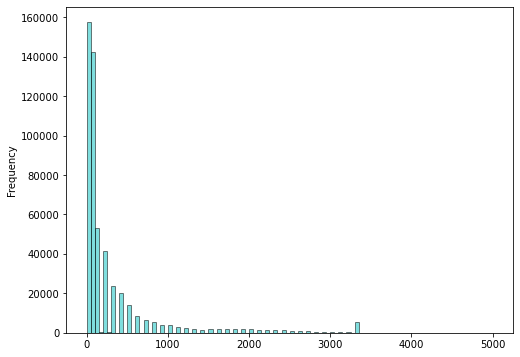

In [521]:
ax = tr_data_outpatient['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0,5000], alpha=0.5, figsize=(8, 6), facecolor='c', edgecolor='k')

In [476]:
val = np.percentile(tr_data_outpatient.InscClaimAmtReimbursed,99.9)
val

3500.0

<h2>Conclusion</h2>
<h4> # Outpatient - ClaimAmt Reimbursed </h4>
<ol>
<li>99.9 percentile value is 3500 </li>
<li>Plot indicates this columns has some outlisers </li>
</ol>

# 5.  Gaining Insights Using labeled Data 

In [478]:
#check all the columns of the  labeled  dataset and top 5 data points
print('Columns in this dataset are : ')
print(target_data.columns)

target_data.head(5)

Columns in this dataset are : 
Index(['Provider', 'PotentialFraud'], dtype='object')


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


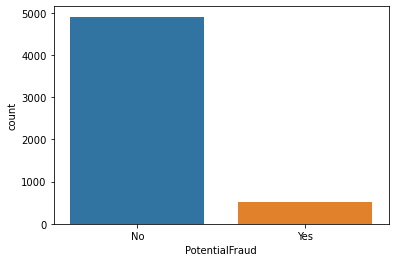

In [479]:
sns.countplot('PotentialFraud',data=target_data)

<h2>Conclusion</h2>
<ol>
<li>Dataset is imbalanced </li>
</ol>

# 5.a Percentage of fraudulent encounters Inpatient / Outpatient

In [39]:
only_fraud_provider = target_data.loc[target_data['PotentialFraud']=='Yes']
print("Dataset shape : ", only_fraud_provider.shape)
only_fraud_provider.head(5)

Dataset shape :  (506, 2)


,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


In [40]:
fraud_provider_inpatient_df = pd.merge(tr_data_inpatient, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
fraud_provider_inpatient_df.head(5)

Dataset shape :  (23402, 31)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes


In [41]:
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
print("Percentage of fraud cases related to inpatinet data : ",(fraud_provider_inpatient_df.shape[0]/tr_data_inpatient.shape[0])*100)

Dataset shape :  (23402, 31)
Percentage of fraud cases related to inpatinet data :  57.81983495577408


<h2>Conclusion</h2>
<li>Around 58 % of the outpatient data for training has fradulent encounter</li>

In [42]:
fraud_provider_outpatient_df = pd.merge(tr_data_outpatient, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
fraud_provider_outpatient_df.head(5)

Dataset shape :  (189394, 28)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [43]:
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
print("Percentage of fraud cases related to outpatinet data : ",(fraud_provider_outpatient_df.shape[0]/tr_data_outpatient.shape[0])*100)

Dataset shape :  (189394, 28)
Percentage of fraud cases related to outpatinet data :  36.58112130290089


<h2>Conclusion</h2>
<li>Around 37 % of the outpatient data for training has fradulent encounter</li>

# 5.b 20 Most used procedure codes and diagnosis codes used by the potential fradulent providers 

# Inpatient - Procedure

(17325, 1)


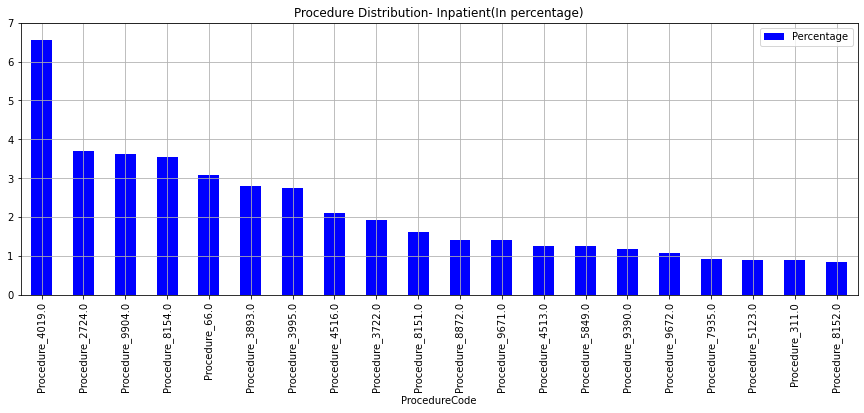

In [498]:
#create a dataframe for concatinating all Procedure Code columns  
inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([fraud_provider_inpatient_df["ClmProcedureCode_1"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_4"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val = 20)


# Inpatient - Diagnosis

(189329, 1)


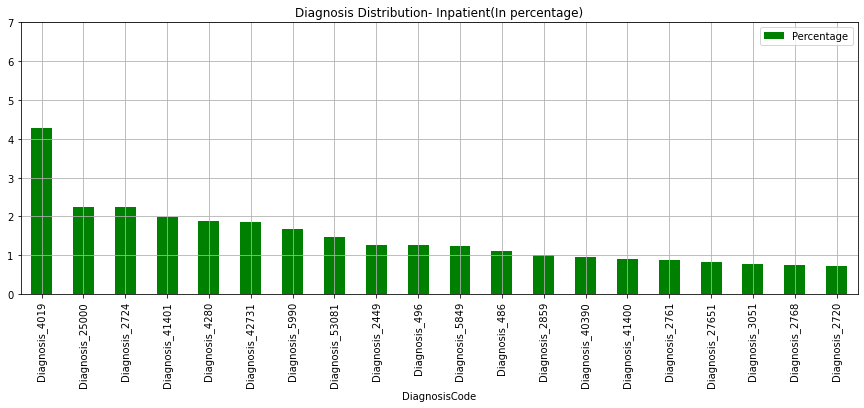

In [505]:
#create a dataframe for concatinating all DiagnosisCode Code columns  

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([fraud_provider_inpatient_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='DiagnosisCode' , prefix = 'Diagnosis_',title = 'Diagnosis Distribution- Inpatient(In percentage)',top_val = 20 ,color = 'g')

# Outpatient - Procedure

(96, 1)


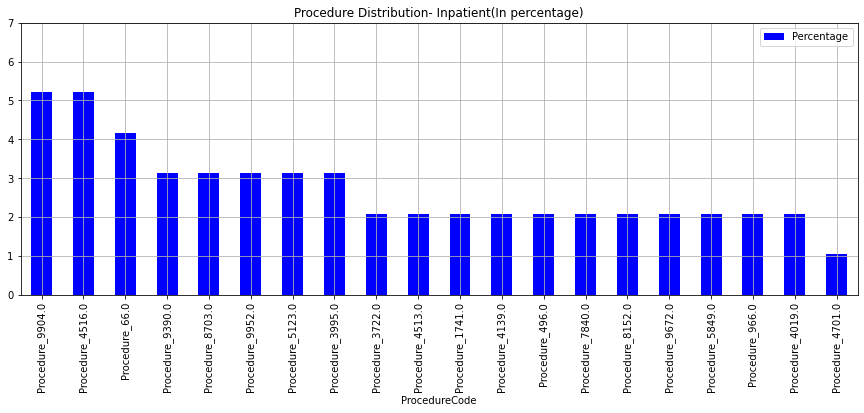

In [503]:
#create a dataframe for concatinating all Procedure Code columns  
inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([fraud_provider_outpatient_df["ClmProcedureCode_1"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_4"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val = 20)


# Outpatient - Diagnosis

(494869, 1)


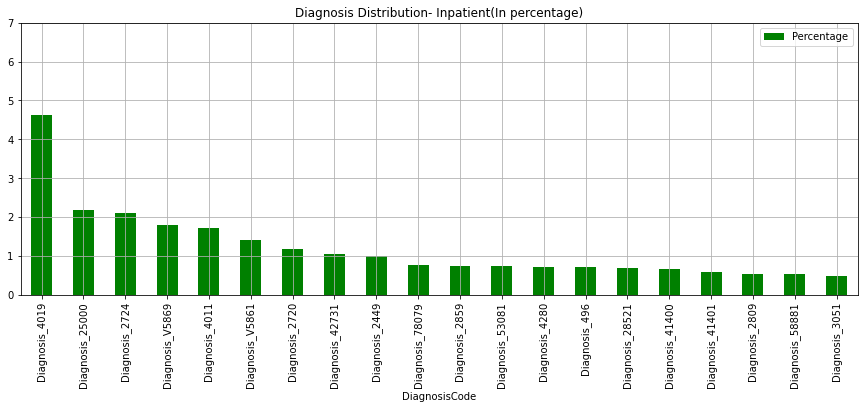

In [506]:
#create a dataframe for concatinating all DiagnosisCode Code columns  

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([fraud_provider_outpatient_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='DiagnosisCode' , prefix = 'Diagnosis_',title = 'Diagnosis Distribution- Inpatient(In percentage)',top_val = 20 ,color = 'g')

# 6.  Gaining Insights from beneficiary Data 

This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

In [507]:
#check all the columns of the beneficiary dataset and top 5 data points
print('Columns in this dataset are : ')
print(tr_data_beneficiary.columns)

tr_data_beneficiary.head(2)

Columns in this dataset are : 
Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


# 6.a State and County

## Inpatient + fraud -- State

In [45]:
tr_bene_inpat_df = pd.merge(tr_data_beneficiary, fraud_provider_inpatient_df, how='inner', on='BeneID')
print(tr_bene_inpat_df.shape)
tr_bene_inpat_df.head(2)

(23402, 55)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11017,1940-06-01,NaN,2,1,0,31,270,12,12,...,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes


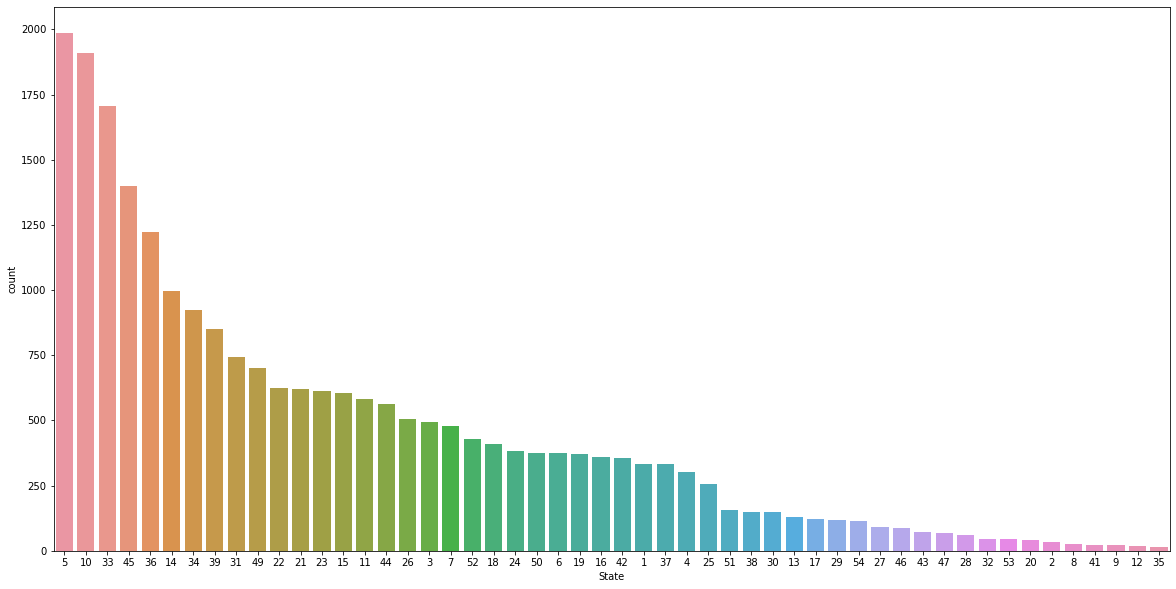

In [46]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data=tr_bene_inpat_df, orient ="v", order = tr_bene_inpat_df['State'].value_counts().index)

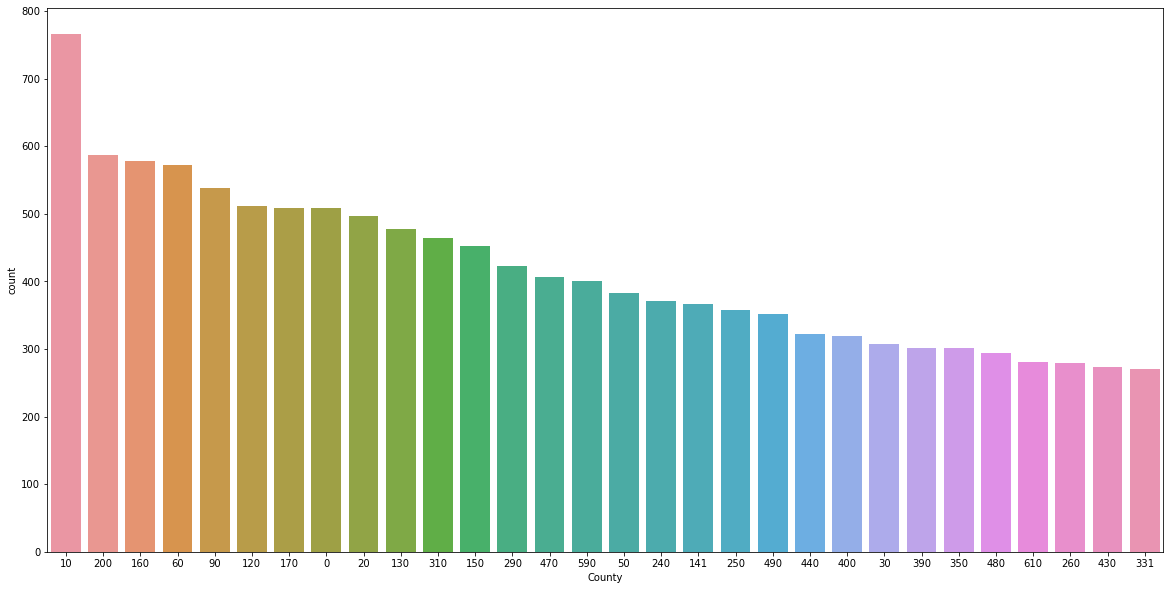

In [52]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='County',y=None, data=tr_bene_inpat_df, orient ="v", order = tr_bene_inpat_df['County'].value_counts().head(30).index)

<h2>Conclusion</h2>
<h4> #Inpatient + fraud -- State </h4>
<ol>
<li>State coded as 5,10,33 and 45 have most fradulent encounters for Inpatient data .</li>
<li>County coded as 10,200,160 and 60 have most fradulent encounters for Inpatient data .</li>


## Outpatient +Fraud  -- State

In [48]:
tr_bene_outpat_df = pd.merge(tr_data_beneficiary, fraud_provider_outpatient_df, how='inner', on='BeneID')
print(tr_bene_outpat_df.shape)
tr_bene_outpat_df.head(2)

(189394, 52)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


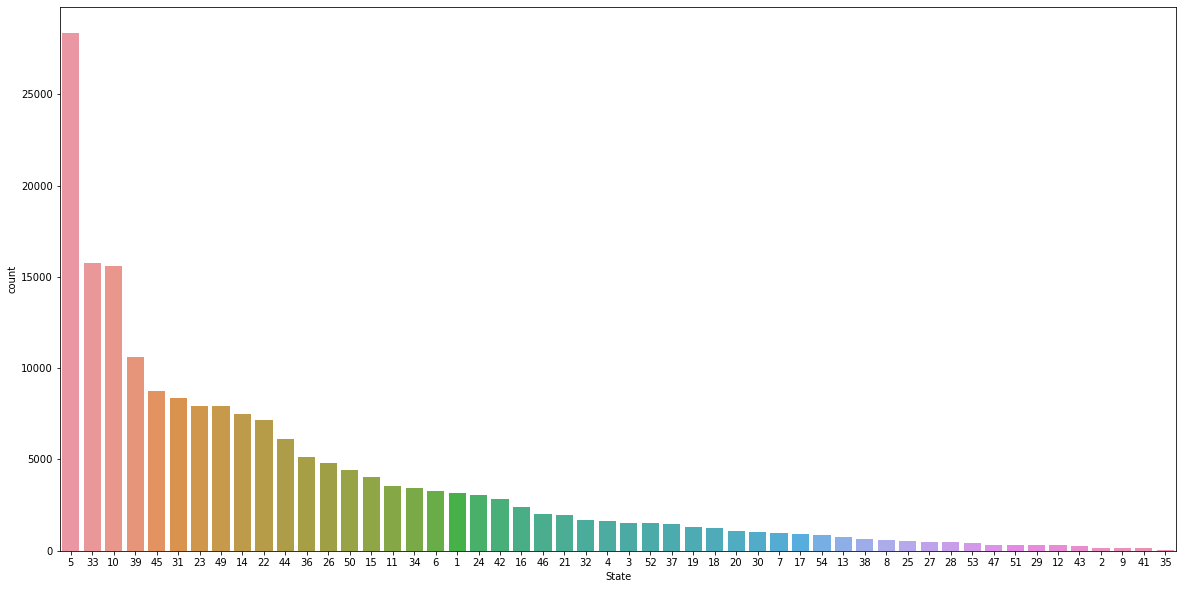

In [54]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['State'].value_counts().index)

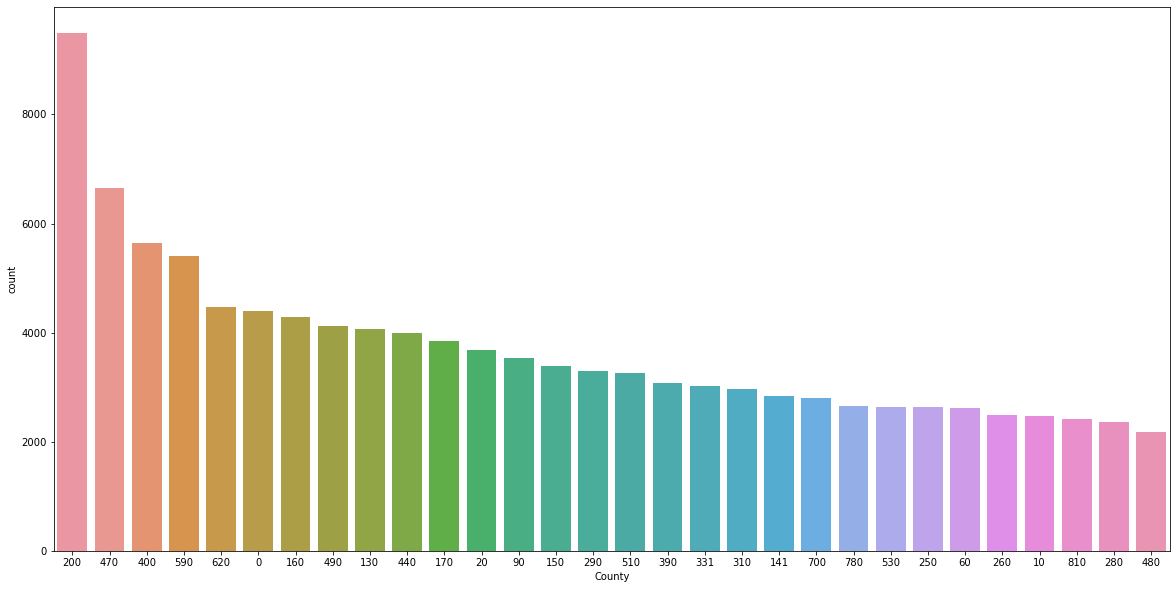

In [55]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='County',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['County'].value_counts().head(30).index)

<h2>Conclusion</h2>
<h4> #Outpatient + fraud -- State </h4>
<ol>
<li>State coded as 5,33,10 and 39 have most fradulent encounters for Inpatient data .</li>
<li>County coded as 200,470,400 and 590 have most fradulent encounters for Outpatient data .</li>

# 6.b DOB

## Inpatient + Fraud - DOB

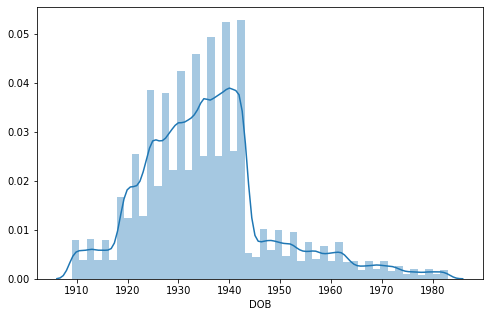

In [522]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_bene_inpat_df.DOB.apply(get_year))

<h2>Conclusion</h2>
<h4> #Inpatient + Fraud - DOB </h4>
<ol>
<li>Most Fradulent ecounters in Inpatatinet Data is observed for the patients born between 1920 and 1945 </li>

## Outpatient + Fraud - DOB

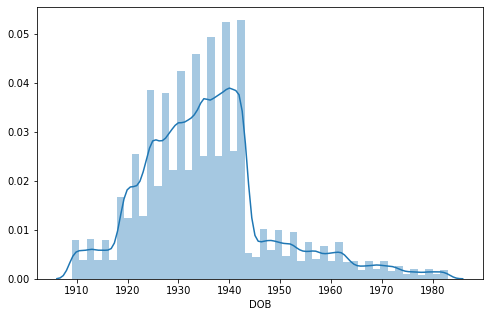

In [524]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_bene_outpat_df.DOB.apply(get_year))

<h2>Conclusion</h2>
<h4> #Outpatient + Fraud - DOB </h4>
<ol>
<li>Most Fradulent ecounters in Inpatatinet Data is observed for the patients born between 1920 and 1945 </li>

# 7.  Calculating Money lost in Fraud for both Inpatient and outpatinet data

In [527]:
#merging Inpatint and labeled fradulent providers
inpat_labeled_provider_df = pd.merge(tr_data_inpatient , target_data , how='inner', on='Provider')
print(inpat_labeled_provider_df.shape)

(40474, 31)


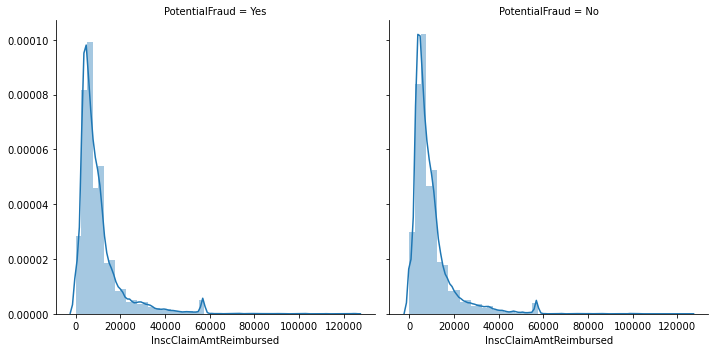

<Figure size 432x288 with 0 Axes>

In [538]:
sns.FacetGrid(inpat_labeled_provider_df, col='PotentialFraud',height=5).map(sns.distplot, "InscClaimAmtReimbursed",).add_legend()
plt.show()
plt.tight_layout()

In [535]:
#calculatinng total money lost ib fradulent encounters
Total_money_lost = inpat_labeled_provider_df.loc[inpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)

Total money lost :  241288510


In [540]:
#merging Outpatint and labeled fradulent providers
outpat_labeled_provider_df = pd.merge(tr_data_outpatient , target_data , how='inner', on='Provider')
print(outpat_labeled_provider_df.shape)

(517737, 28)


In [542]:
#calculatinng total money lost ib fradulent encounters
Total_money_lost = outpat_labeled_provider_df.loc[outpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)

Total money lost :  54392610


In [545]:
 print('Total monney lost as per the data for 2019 = ','241288510+54392610, That is around 290 Million' )

Total monney lost as per the data for 2019 =  241288510+54392610, That is around 290 Million


<h3><b>Upto this point we have done thorough EDA on columns of each of the data files. NOw we will merge them all and then perform EDA to establish a trend in data and the  target </b></h3>

# Data preprocessing and Feature Engineering

## Merging all datasets together

In [64]:
tr_data_inpatient['is_admitted'] = 1
tr_data_outpatient['is_admitted'] = 0

In [65]:
# Merge in_pt, out_pt and ben df into a single patient dataset
tr_data1 = pd.merge(tr_data_inpatient, tr_data_outpatient,
                    left_on = [ idx for idx in tr_data_outpatient.columns if idx in tr_data_inpatient.columns],
                    right_on = [ idx for idx in tr_data_outpatient.columns if idx in tr_data_inpatient.columns],
                    how = 'outer').\
          merge(tr_data_beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [66]:
# Replace values with a binary annotation
tr_data1 = tr_data1.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                   'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                   'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                   'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 
                  0)

In [67]:
#tr_data1.RenalDiseaseIndicator.unique() #array(['0', 'Y'], dtype=object)
# Replace values with a binary annotation
tr_data1 = tr_data1.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})#array([0, 1], dtype=int64)

In [68]:
#merging the dataset created in above step with target_data
tr_data_final = pd.merge(tr_data1, target_data , how = 'outer', on = 'Provider' )

In [69]:
# adding extra column target, having binary annotation
tr_data_final['target'] = tr_data_final['PotentialFraud']

# 1 representing potential fraud and 0 representing non potential fraud
tr_data_final['target'] = tr_data_final['target'].map({"Yes":1,"No":0})
tr_data_final['target'] = tr_data_final['target'].astype('category',copy=False)


No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


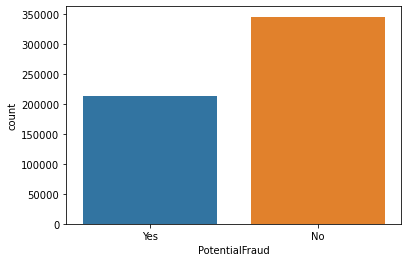

In [70]:
print(tr_data_final.PotentialFraud.value_counts())
sns.countplot(x='PotentialFraud', data=tr_data_final)

In [71]:
print(tr_data_final.shape)
tr_data_final.head(5)

(558211, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,1,1,36000,3204,60,70,Yes,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,1,0,0,0,24000,2136,450,200,Yes,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,0,0,0,19000,1068,100,20,Yes,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,0,0,17000,1068,1050,540,Yes,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,0,27000,2136,450,160,Yes,1


In [72]:
#check colums for NaN values
tr_data_final.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [73]:
#Adding a column is_dead  = 1  DOD is given else is_dead = 0 
tr_data_final.loc[tr_data_final['DOD'].isnull(), 'Is_Dead'] = '0'
tr_data_final.loc[(tr_data_final['DOD'].notnull()), 'Is_Dead'] = '1'

As we have DOD for only few BeneID,so we can only determine the eaxct age of the patinets who has died.we cannot get the age of the patonets who might be alive.So its better that we calculate the age of the patient when we submiited his claim as we have record for ClaimStartDt

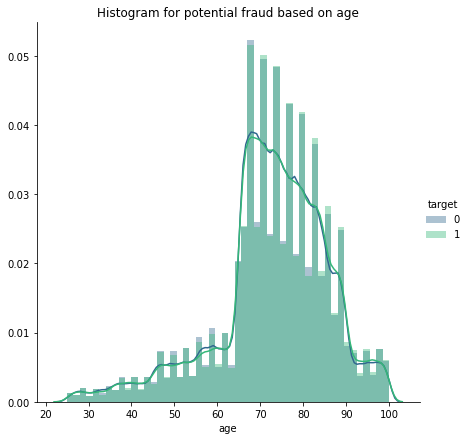

<Figure size 432x288 with 0 Axes>

In [74]:
tr_data_final['DOB'] =  pd.to_datetime(tr_data_final['DOB'], format='%Y-%m-%d')  
tr_data_final['ClaimStartDt'] = pd.to_datetime(tr_data_final['ClaimStartDt'], format='%Y-%m-%d')  

#now = pd.to_datetime('2020-09-01' , format = '%Y-%m-%d')
tr_data_final['DOB'] = tr_data_final['DOB'].where(tr_data_final['DOB'] < tr_data_final['ClaimStartDt']) 
tr_data_final['age'] = (tr_data_final['ClaimStartDt'] - tr_data_final['DOB']).astype('<m8[Y]')


#plotting age
sns.FacetGrid(tr_data_final, hue="target" , size=6, palette='viridis').map(sns.distplot, "age",).add_legend()
plt.title('Histogram for potential fraud based on age')
plt.show()
plt.tight_layout()

<h2>Conclusion</h2>
<h4> # Age </h4>
<ol>
<li>We dont see any differnce in distribution of age that may enable us to flag potential fraud.</li>
<li>But we see increasing trend in the potential fraud cases for patients age > 65 Also most of the patient who applied for claim fall in this age range only</li>

Text(0.5, 1.0, 'Plot to Analyse relation between Race and fraud/not fraud')

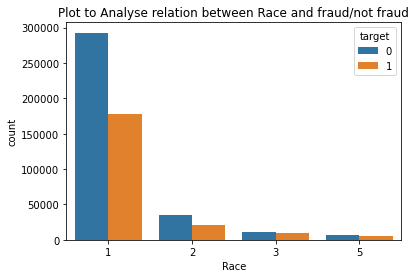

In [186]:
ax = sns.countplot(x='Race',data=tr_data_final,hue='target')
ax.set_title("Plot to Analyse relation between Race and fraud/not fraud")

<h2>Conclusion</h2>
<ol>
<li>It is very important to see that most fradulent cases is with patients belonging to a perticular Race and that is labelled as 1</li>
</o>

In [75]:
tr_data_final = tr_data_final.drop(['DOD'], axis = 1)
tr_data_final = tr_data_final.drop(['DOB'], axis = 1)

In [76]:
#calculating number of days a patinet was admitted in the hospital and then removing admit and discharge date
#outpatients dont get admitted so we keep 0 for them


tr_data_final['AdmissionDt'] = pd.to_datetime(tr_data_final['AdmissionDt'] , format = '%Y-%m-%d')
tr_data_final['DischargeDt'] = pd.to_datetime(tr_data_final['DischargeDt'],format = '%Y-%m-%d')
tr_data_final['Num_admit_days'] = ((tr_data_final['DischargeDt'] - tr_data_final['AdmissionDt']).dt.days)+1
tr_data_final.loc[tr_data_final['is_admitted'] == 0, 'Num_admit_days'] = '0'

tr_data_final = tr_data_final.drop(['DischargeDt'], axis = 1)
tr_data_final = tr_data_final.drop(['AdmissionDt'], axis = 1)

In [79]:
#check colums for NaN values
#tr_data_final.isna().sum()

In [80]:
#repalcing NaN value with 0
tr_data_final.loc[tr_data_final['DeductibleAmtPaid'].isnull(),'DeductibleAmtPaid'] = 0

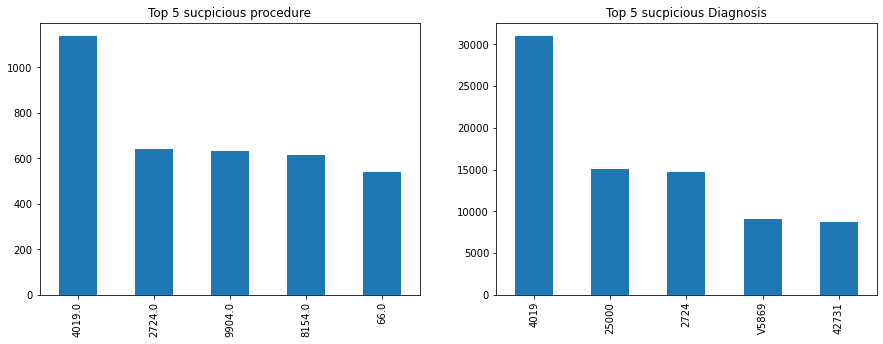

In [82]:
potential_fraud_df =tr_data_final.loc[tr_data_final['PotentialFraud'] == 'Yes']

df1 = pd.DataFrame(columns = ['ProcedureCode'])
df1['ProcedureCode'] = pd.concat([potential_fraud_df["ClmProcedureCode_1"], 
                                           potential_fraud_df["ClmProcedureCode_2"],
                                           potential_fraud_df["ClmProcedureCode_3"],
                                           potential_fraud_df["ClmProcedureCode_4"], 
                                           potential_fraud_df["ClmProcedureCode_5"], 
                                           potential_fraud_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

df2 = pd.DataFrame(columns = ['DiagnosisCode'])
df2['DiagnosisCode'] = pd.concat([potential_fraud_df["ClmDiagnosisCode_1"], 
                                           potential_fraud_df["ClmDiagnosisCode_2"], 
                                           potential_fraud_df["ClmDiagnosisCode_3"], 
                                           potential_fraud_df["ClmDiagnosisCode_4"],
                                           potential_fraud_df["ClmDiagnosisCode_5"], 
                                           potential_fraud_df["ClmDiagnosisCode_6"],
                                           potential_fraud_df["ClmDiagnosisCode_7"],
                                           potential_fraud_df["ClmDiagnosisCode_8"],
                                           potential_fraud_df["ClmDiagnosisCode_9"],
                                           potential_fraud_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

plt.figure(figsize=(15, 5))
plt.subplot(121)
df1.ProcedureCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 sucpicious procedure')

plt.subplot(122)
df2.DiagnosisCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 sucpicious Diagnosis')

In [83]:
Diag_proce_col = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
                  'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                  'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                  'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
                  'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                  'ClmProcedureCode_5', 'ClmProcedureCode_6']

tr_data_final[Diag_proce_col]= tr_data_final[Diag_proce_col].replace({np.nan:0})
tr_data_final.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target,Is_Dead,age,Num_admit_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,36000,3204,60,70,Yes,1,0,66.0,7
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0,...,0,24000,2136,450,200,Yes,1,0,77.0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,19000,1068,100,20,Yes,1,0,95.0,13
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,17000,1068,1050,540,Yes,1,0,87.0,19
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,0,27000,2136,450,160,Yes,1,0,79.0,5


In [86]:
def encoded_cat(dataset, feature_to_encode='',col_list=[]):
    """This function returns top 5 cat column useful in determining potential fraud"""
    outer_list =[]
    for col in col_list:
        list_1 = list()
        
        for item in list(dataset[col]):
            if str(item) == str(feature_to_encode):
                list_1.append(1)
            else:
                list_1.append(0)
        
        outer_list.append(list_1)
    
    li_sum = np.array([0]*558211)
    
    for i in range(0,len(outer_list)):
        li1 = np.array(outer_list[i])
        li_sum = li_sum + li1
        
    return li_sum


procedure_col = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
   
diagnosis_col = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']


#top 5 procedure
# 4019.0, 2724.0, 9904.0, 8154.0, 66.0
tr_data_final['pr_4019'] = encoded_cat(tr_data_final,'4019.0',procedure_col)
tr_data_final['pr_2724'] = encoded_cat(tr_data_final,'2724.0',procedure_col)
tr_data_final['pr_9904'] = encoded_cat(tr_data_final,'9904.0',procedure_col)
tr_data_final['pr_8154'] = encoded_cat(tr_data_final,'8154.0',procedure_col)
tr_data_final['pr_66'] =   encoded_cat(tr_data_final,'66.0',procedure_col)

#top 5 diagnosis 
#4019,25000,2724,V5869,42731
tr_data_final['di_4019'] = encoded_cat(tr_data_final,'4019',diagnosis_col)
tr_data_final['di_25000'] = encoded_cat(tr_data_final,'25000',diagnosis_col)
tr_data_final['di_2724'] = encoded_cat(tr_data_final,'2724',diagnosis_col)
tr_data_final['di_V5869'] = encoded_cat(tr_data_final,'V5869',diagnosis_col)
tr_data_final['di_42731'] =   encoded_cat(tr_data_final,'42731',diagnosis_col)

In [101]:
for i in Diag_proce_col:
    tr_data_final[i][tr_data_final[i]!=0]= 1

tr_data_final[Diag_proce_col].head(5)

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,1,1,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,1,1,1,1,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [103]:
tr_data_final[Diag_proce_col]= tr_data_final[Diag_proce_col].astype(float)

In [114]:
#adding column total_num_diag
tr_data_final['total_num_diag'] = 0 
for col in diagnosis_col :
    tr_data_final['total_num_diag']  = tr_data_final['total_num_diag'] + tr_data_final[col]

In [115]:
#adding column total_num_proce
tr_data_final['total_num_proce'] = 0 
for col in procedure_col :
    tr_data_final['total_num_proce']  = tr_data_final['total_num_proce'] + tr_data_final[col]

In [118]:
tr_data_final['total_num_diag'] =  tr_data_final['total_num_diag'].astype(float)
tr_data_final['total_num_proce'] =  tr_data_final['total_num_proce'].astype(float)

### Checking if we have duplicate rows

In [127]:
#Checking we how many distinct BeneID we have in our data
#len(list(tr_data_final.BeneID.value_counts()==1))
len(list(tr_data_final['BeneID'].unique()))

138556

In [128]:
#Checking we how many distinct BeneID we have in our data
len(list(tr_data_final['ClaimID'].unique()))

558211

<h2>Conclusion</h2>
<ol>
<li>We have data for 138556 BeneID.Means one beneficiarty has applied  for claim mulriple times</li>
<li>Also we have 558211 distinct claimsID,means we have seperate record for each benefiacry every time he appliedd for claims </li>
<li>No duplicate rows are present in our dataset </li>

In [140]:
val_counts_ = tr_data_final['BeneID'].value_counts()
tr_data_final_beneid_df = val_counts_.to_frame() #store this information in dataframe

tr_data_final_beneid_df.columns = ['count'] 
tr_data_final_beneid_df['BeneID'] = tr_data_final_beneid_df.index
tr_data_final_beneid_df

,count,BeneID
BENE42721,29,BENE42721
BENE118316,29,BENE118316
BENE59303,29,BENE59303
BENE36330,28,BENE36330
BENE44241,28,BENE44241
...,...,...
BENE17075,1,BENE17075
BENE114028,1,BENE114028
BENE49055,1,BENE49055
BENE97955,1,BENE97955


In [161]:
total_amt_list = []
mean_amt_list = []

for benid in tqdm(tr_data_final_beneid_df['BeneID']):
    
    total_amt = tr_data_final.loc[tr_data_final['BeneID'] == benid,'InscClaimAmtReimbursed'].sum() 
    mean_amt = total_amt / (tr_data_final_beneid_df.loc[tr_data_final_beneid_df['BeneID'] == benid,'count'])
    
    total_amt_list.append(total_amt)
    mean_amt_list.append(mean_amt)
    

100%|████████████████████████████████████████████████████████████████████████| 138556/138556 [4:32:59<00:00,  8.46it/s]


In [169]:
mean_list = []
for item in tqdm(mean_amt_list):
    mean_list.append(item[0])

100%|███████████████████████████████████████████████████████████████████████| 138556/138556 [00:03<00:00, 39340.36it/s]


In [172]:
tr_data_final_beneid_df['mean_InscClaimAmtReimbursed']=mean_list
tr_data_final_beneid_df['total_InscClaimAmtReimbursed']= total_amt_list
tr_data_final_beneid_df

,count,BeneID,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed
BENE42721,29,BENE42721,1217.586207,35310
BENE118316,29,BENE118316,1481.034483,42950
BENE59303,29,BENE59303,1175.862069,34100
BENE36330,28,BENE36330,2181.785714,61090
BENE44241,28,BENE44241,1486.428571,41620
...,...,...,...,...
BENE17075,1,BENE17075,70.000000,70
BENE114028,1,BENE114028,6000.000000,6000
BENE49055,1,BENE49055,11000.000000,11000
BENE97955,1,BENE97955,1100.000000,1100


In [173]:
tr_data_final_beneid_df.to_csv('tr_data_final_beneid_df.csv',index= False)

In [162]:
import pickle

with open('total_amt_list.pkl', 'wb') as f:
    pickle.dump(total_amt_list, f)
    
with open('mean_amt_list.pkl', 'wb') as f:
    pickle.dump(mean_amt_list, f)

In [181]:
tr_data_final = pd.merge(tr_data_final, tr_data_final_beneid_df, how='outer', on='BeneID')
print("Dataset shape : ", tr_data_final.shape)
tr_data_final.head(5)

Dataset shape :  (558211, 71)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,di_4019,di_25000,di_2724,di_V5869,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,1.0,...,1,0,1,0,0,9.0,0.0,3,12000.0,36000
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,1.0,...,0,0,0,0,0,3.0,1.0,3,12000.0,36000
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,1.0,...,0,0,0,0,0,6.0,0.0,3,12000.0,36000
3,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0.0,...,0,0,0,0,0,9.0,0.0,3,3150.0,9450
4,BENE16973,CLM65335,2009-08-25,2009-08-30,PRV55905,9000,PHY340413,PHY340413,NaN,1.0,...,0,0,0,0,0,3.0,1.0,3,3150.0,9450


In [182]:
tr_data_final[['mean_InscClaimAmtReimbursed','total_InscClaimAmtReimbursed']]= tr_data_final[['mean_InscClaimAmtReimbursed','total_InscClaimAmtReimbursed']].astype(float)

In [187]:
def N_unique_values(df):
    """This function finds the unique values in a df row"""
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

In [188]:
#number of unique physicians for each patient
tr_data_final['N_unique_Physicians'] = N_unique_values(tr_data_final[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]) 

#encoding types of physicians into numeric values
tr_data_final[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(tr_data_final[['AttendingPhysician','OperatingPhysician',
                                                                                      'OtherPhysician']].isnull(), 0, 1)

# number of different physicians who attend a patient
tr_data_final['N_Types_Physicians'] = tr_data_final['AttendingPhysician'] +  tr_data_final['OperatingPhysician'] + tr_data_final['OtherPhysician']

# patients who was attended by only 1 physicians
tr_data_final['Same_Physician'] = tr_data_final.apply(lambda x: 1 if (x['N_unique_Physicians'] == 1 and x['N_Types_Physicians'] > 1) else 0,axis=1)

#determine if 1 physician has multi[le role to attend a patient
tr_data_final['Same_Physician2'] = tr_data_final.apply(lambda x: 1 if (x['N_unique_Physicians'] == 2 and x['N_Types_Physicians'] > 2) else 0,axis=1)

tr_data_final[['N_unique_Physicians','N_Types_Physicians','Same_Physician','Same_Physician2']].head()

,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,1,1,0,0
1,1,2,1,0
2,2,2,0,0
3,2,2,0,0
4,1,2,1,0


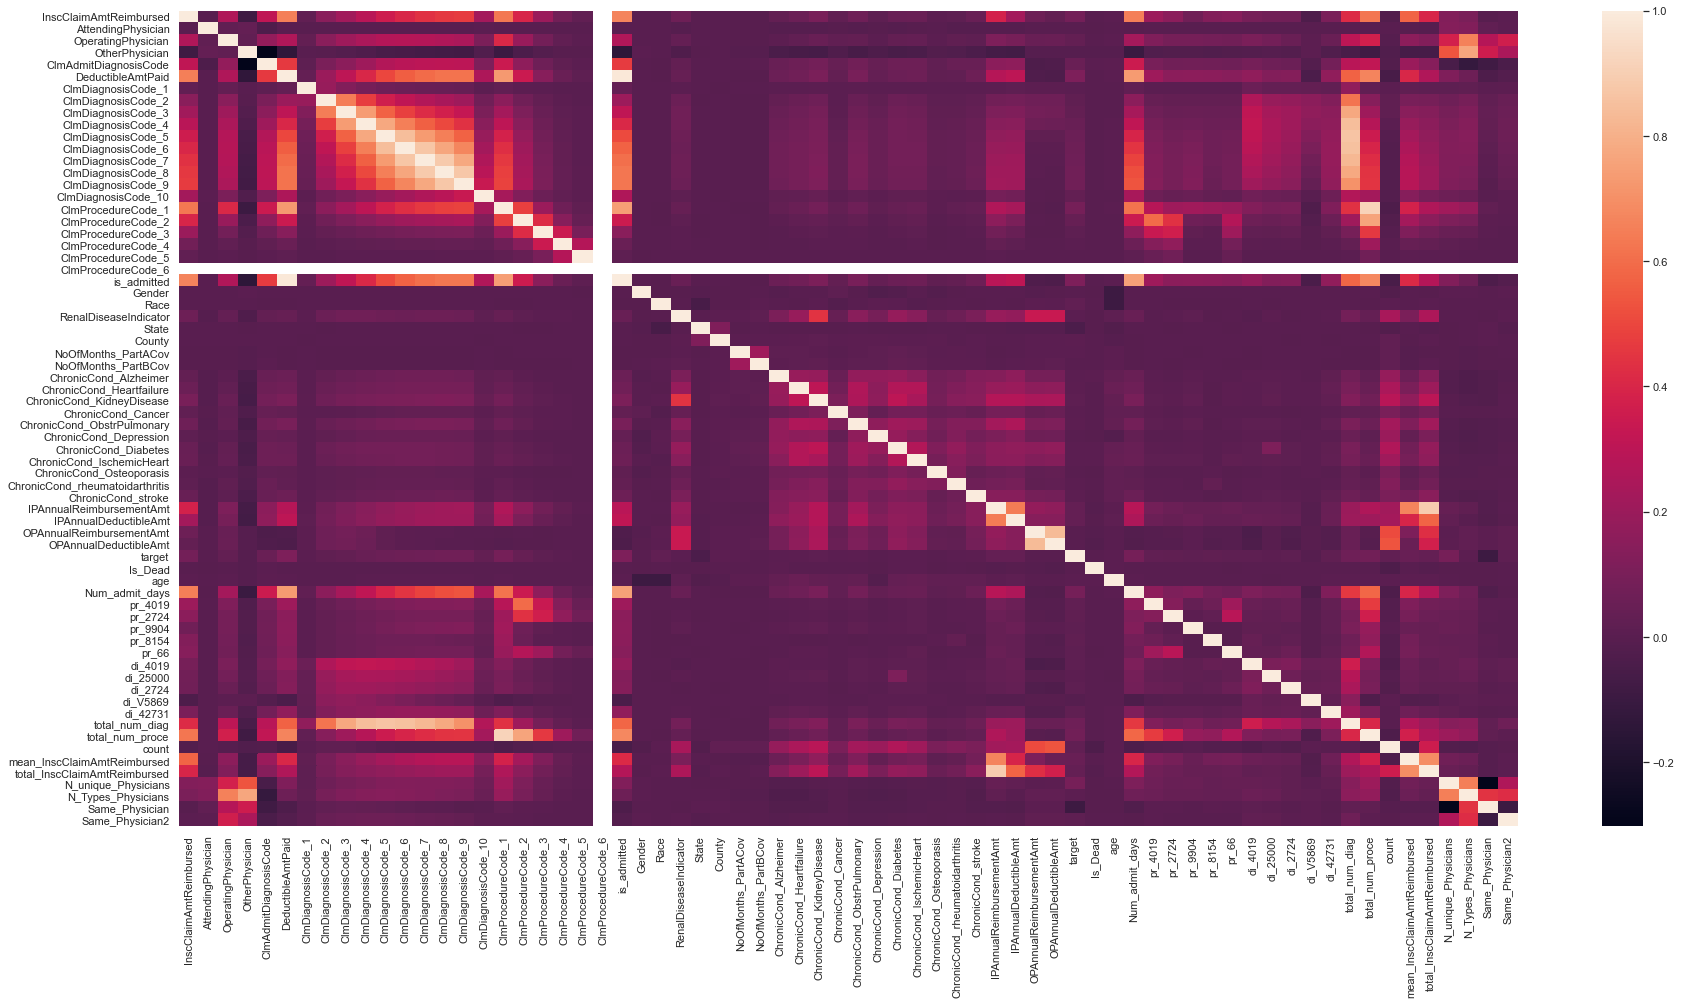

In [192]:
#plot correlation heat map between features
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(30, 15))
corr = tr_data_final.corr()
sns.heatmap(corr, annot=False)

In [200]:
#repalve NaN val with 0
#tr_data_final.DiagnosisGroupCode
tr_data_final['DiagnosisGroupCode']= tr_data_final['DiagnosisGroupCode'].replace({np.nan:0})

In [202]:
#final check to see if a col val is NaN
col_inf_df=pd.DataFrame() 
val = tr_data_final.isnull().sum()
col_inf_df['null_col_count']  = val
col_inf_df['column'] = val.index
col_inf_df.loc[col_inf_df['null_col_count'] !=0]

,null_col_count,column


In [208]:
col_inf_df.null_col_count.value_counts()

0    75
Name: null_col_count, dtype: int64

In [205]:
for col in tr_data_final.columns:
    print(col)

BeneID
ClaimID
ClaimStartDt
ClaimEndDt
Provider
InscClaimAmtReimbursed
AttendingPhysician
OperatingPhysician
OtherPhysician
ClmAdmitDiagnosisCode
DeductibleAmtPaid
DiagnosisGroupCode
ClmDiagnosisCode_1
ClmDiagnosisCode_2
ClmDiagnosisCode_3
ClmDiagnosisCode_4
ClmDiagnosisCode_5
ClmDiagnosisCode_6
ClmDiagnosisCode_7
ClmDiagnosisCode_8
ClmDiagnosisCode_9
ClmDiagnosisCode_10
ClmProcedureCode_1
ClmProcedureCode_2
ClmProcedureCode_3
ClmProcedureCode_4
ClmProcedureCode_5
ClmProcedureCode_6
is_admitted
Gender
Race
RenalDiseaseIndicator
State
County
NoOfMonths_PartACov
NoOfMonths_PartBCov
ChronicCond_Alzheimer
ChronicCond_Heartfailure
ChronicCond_KidneyDisease
ChronicCond_Cancer
ChronicCond_ObstrPulmonary
ChronicCond_Depression
ChronicCond_Diabetes
ChronicCond_IschemicHeart
ChronicCond_Osteoporasis
ChronicCond_rheumatoidarthritis
ChronicCond_stroke
IPAnnualReimbursementAmt
IPAnnualDeductibleAmt
OPAnnualReimbursementAmt
OPAnnualDeductibleAmt
PotentialFraud
target
Is_Dead
age
Num_admit_days
pr_40

In [206]:
#saving dataframe to csv file to avoid rework
tr_data_final.to_csv("tr_data_final.csv",index= False)

In [8]:
tr_data_final = pd.read_csv("tr_data_final.csv")

print(tr_data_final.shape)
tr_data_final.head(2)

(558211, 75)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,1,0,0,1.0,...,0,9.0,0.0,3,12000.0,36000.0,1,1,0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,1,1,0,1.0,...,0,3.0,1.0,3,12000.0,36000.0,1,2,1,0


In [9]:
col_to_remove = ['Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',\
                 'OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode','NoOfMonths_PartACov',\
                 'NoOfMonths_PartBCov','DiagnosisGroupCode','PotentialFraud']

tr_data_final.drop(columns=col_to_remove, axis=1, inplace=True)
tr_data_final['target']=tr_data_final['target'].astype(int)

In [10]:
tr_data_final.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,26000,1068.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,0.0,3,12000.0,36000.0,1,1,0,0
1,5000,1068.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,1.0,3,12000.0,36000.0,1,2,1,0
2,5000,1068.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,6.0,0.0,3,12000.0,36000.0,2,2,0,0
3,50,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,0.0,3,3150.0,9450.0,2,2,0,0
4,9000,1068.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,1.0,3,3150.0,9450.0,1,2,1,0


In [11]:
tr_data_final['target'].value_counts()

0    345415
1    212796
Name: target, dtype: int64

In [12]:
y = tr_data_final['target']
X = tr_data_final.drop('target', axis=1)

In [13]:
X.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'is_admitted', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Is_Dead', 'ag

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


print("Shapes data into train,test,CV splitting..")
print("Training X : ",X_train.shape," | Training Y : ",y_train.shape)
print("Test X : ",X_test.shape," | Test Y : ",y_test.shape)

Shapes data into train,test,CV splitting..
Training X :  (374001, 61)  | Training Y :  (374001,)
Test X :  (184210, 61)  | Test Y :  (184210,)


# Handling Numerical Column

In [15]:
from sklearn.preprocessing import Normalizer , StandardScaler

def num_col_normalizer(X_tr,X_te,col=''):
    """This function retruns normalised column for train and test data"""
    normalizer = Normalizer()
    
    normalizer.fit(X_tr[col].values.reshape(1,-1))
    
    tr = normalizer.transform(X_tr[col].values.reshape(1,-1)).reshape(-1,1)
    te = normalizer.transform(X_te[col].values.reshape(1,-1)).reshape(-1,1)
    
    return tr,te

#InscClaimAmtReimbursed
tr,te = num_col_normalizer(X_train, X_test,col='InscClaimAmtReimbursed')
X_train['InscClaimAmtReimbursed'] = tr
X_test ['InscClaimAmtReimbursed'] = te

tr,te = num_col_normalizer(X_train, X_test,col='DeductibleAmtPaid')
X_train['DeductibleAmtPaid'] = tr
X_test ['DeductibleAmtPaid'] = te

tr,te = num_col_normalizer(X_train, X_test,col='IPAnnualReimbursementAmt')
X_train['IPAnnualReimbursementAmt'] = tr
X_test ['IPAnnualReimbursementAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='IPAnnualDeductibleAmt')
X_train['IPAnnualDeductibleAmt'] = tr
X_test ['IPAnnualDeductibleAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='OPAnnualReimbursementAmt')
X_train['OPAnnualReimbursementAmt'] = tr
X_test ['OPAnnualReimbursementAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='OPAnnualDeductibleAmt')
X_train['OPAnnualDeductibleAmt'] = tr
X_test ['OPAnnualDeductibleAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='mean_InscClaimAmtReimbursed')
X_train['mean_InscClaimAmtReimbursed'] = tr
X_test ['mean_InscClaimAmtReimbursed'] = te

tr,te = num_col_normalizer(X_train, X_test,col='total_InscClaimAmtReimbursed')
X_train['total_InscClaimAmtReimbursed'] = tr
X_test ['total_InscClaimAmtReimbursed'] = te


tr,te = num_col_normalizer(X_train, X_test,col='age')
X_train['age'] = tr
X_test ['age'] = te
        
tr,te = num_col_normalizer(X_train, X_test,col='Num_admit_days')
X_train['Num_admit_days'] = tr
X_test ['Num_admit_days'] = te

tr,te = num_col_normalizer(X_train, X_test,col='N_unique_Physicians')
X_train['N_unique_Physicians'] = tr
X_test ['N_unique_Physicians'] = te


tr,te = num_col_normalizer(X_train, X_test,col='N_Types_Physicians')
X_train['N_Types_Physicians'] = tr
X_test ['N_Types_Physicians'] = te

In [16]:
X_train.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
291034,0.000165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,5,0.000107,0.000098,0.002355,0.001939,0,0
469483,0.000165,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,5,0.000162,0.000147,0.001178,0.000970,0,0
58448,0.000033,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,6,0.000371,0.000406,0.001178,0.001939,1,0
403368,0.000012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,0.0,3,0.000045,0.000025,0.002355,0.001939,0,0
138503,0.000124,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,2.0,17,0.000171,0.000528,0.002355,0.001939,0,0


In [17]:
X_test.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
146519,0.000179,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,2,0.000241,0.000089,0.001679,0.001382,0,0
11321,0.000006,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,6.0,0.0,7,0.000134,0.000172,0.001679,0.001382,0,0
46577,0.000537,0.001639,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2.0,0.0,9,0.000170,0.000282,0.001679,0.001382,0,0
85539,0.000358,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,7,0.000465,0.000599,0.001679,0.002763,1,0
170928,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3.0,0.0,3,0.000061,0.000034,0.001679,0.001382,0,0


## Utility Functions

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [27]:
def get_threshould_fpr_tpr(y, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    return fpr, tpr, thresholds

def draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr):
    plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

#determining best threshold
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#pridicting Yq for given Xq with best threshold:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def get_confusion_matrix(y, y_pred,axis, best_t):
    cm = pd.DataFrame(confusion_matrix(y, predict_with_best_t(y_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'],ax=axis)

In [28]:
def model_performence_check(model,X_train,X_test,y_train,y_test):
    
    y_train_pred = model.predict_proba(X_train)[:,1]    
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = get_threshould_fpr_tpr(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = get_threshould_fpr_tpr(y_test, y_test_pred)
    
    #plot Roc_AUC_curve
    draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    #draw confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 

    #training confusion matrix heatmap
    get_confusion_matrix(y_train, y_train_pred,ax[0], best_t)
    ax[0].set_title("confusion matrix for traning data")

    #test confusion matrix heatmap
    get_confusion_matrix(y_test, y_test_pred,ax[1], best_t)
    ax[1].set_title("confusion matrix for test data")
    
    actual_output = y_test
    pred_output = predict_with_best_t(y_test_pred, best_t)
    
    model_f1_score = metrics.f1_score(actual_output,pred_output)
    print("Model test F1 score is : ",model_f1_score)
    
    model_AUC_score = metrics.auc(test_fpr, test_tpr)
    print("Model test AUC score is : ",model_AUC_score)
    
    return (model_f1_score, model_AUC_score)

# Model : using all features

### Model 1 : LR

In [20]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.6274582074573487


In [21]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.627056077303078


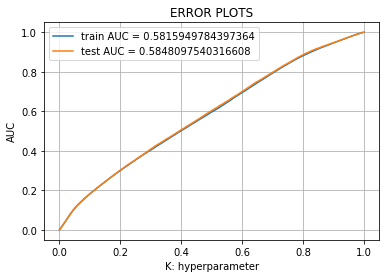

the maximum value of tpr*(1-fpr) 0.30249712354281744 for threshold 0.388
Model test F1 score is :  0.4787005314499716
Model test AUC score is :  0.5848097540316608


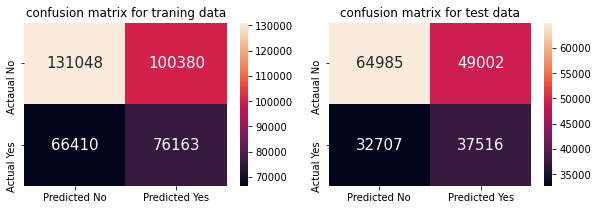

In [35]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train,X_test,y_train,y_test)

### Model 2: Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("roc_auc :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

tuned hpyerparameters :(best parameters)  {'max_depth': 50, 'min_samples_split': 270}
roc_auc : 0.8231578830100093


In [46]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 270)
DT_model2=DT_model2.fit(X_train,y_train)

print("score",DT_model2.score(X_test,y_test))

score 0.7362683893382552


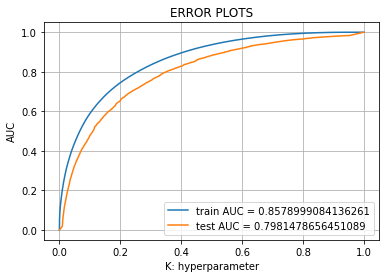

the maximum value of tpr*(1-fpr) 0.5973580981280479 for threshold 0.498
Model test F1 score is :  0.6721663937022734
Model test AUC score is :  0.7981478656451089


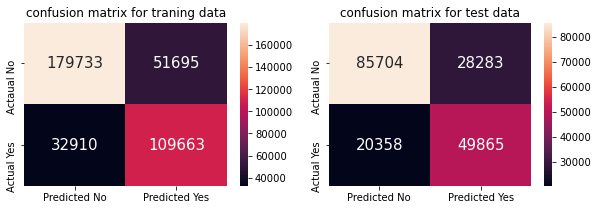

In [47]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train,X_test,y_train,y_test)

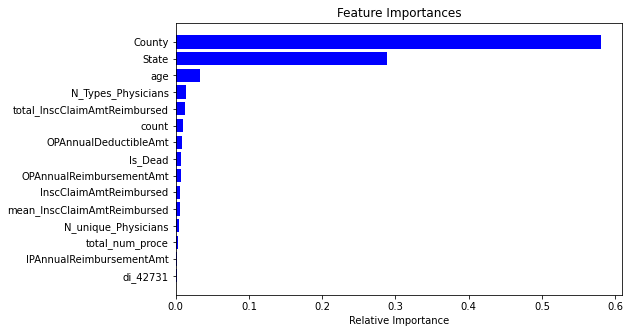

In [52]:
features = tr_data_final.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("roc_auc :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 53.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 57

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
roc_auc : 0.6542018319362368


In [61]:
RF2 = RandomForestClassifier(n_estimators = 300,max_features='auto',max_depth=8,criterion='gini',
                             class_weight = 'balanced',n_jobs=-1,verbose=10, random_state=42)

RF2=RF2.fit(X_train,y_train)

print("score",RF2.score(X_test,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300building tree 7 of 300
building tree 8 of 300

building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s


building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s


building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s


building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.9s


building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300building tree 63 of 300

building tree 64 of 300


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.8s


building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.9s


building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.0s


building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.2s


building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.5s


building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300


[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.8s


building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.1s


building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300


[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.7s


building tree 175 of 300
building tree 176 of 300
building tree 177 of 300building tree 178 of 300

building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.3s


building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   17.0s


building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300


[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   18.7s


building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300


[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   20.5s


building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   22.2s


building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    

score 0.6275066500190001


[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.9s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Para

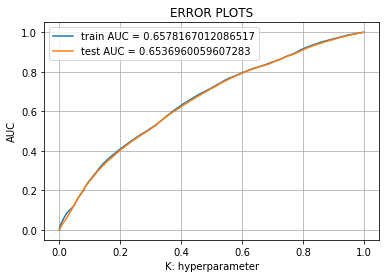

the maximum value of tpr*(1-fpr) 0.37824866477405833 for threshold 0.48
Model test F1 score is :  0.5589279469900369
Model test AUC score is :  0.6536960059607283


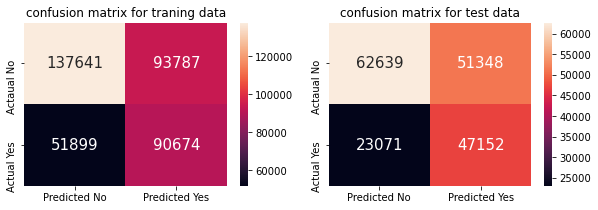

In [63]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train,X_test,y_train,y_test)

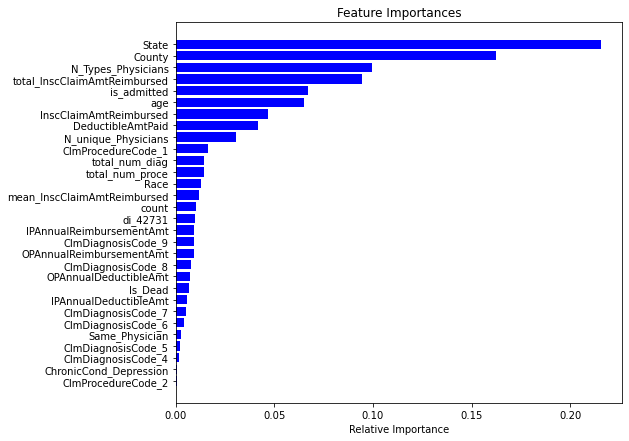

In [74]:
features = tr_data_final.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [65]:
!pip install xgboost

     |████████████████████████████████| 148.9 MB 31 kB/s /s eta 0:00:01


### Model 4: Xg_Boost

In [67]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='roc_auc', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  5.5min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  5.9min remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.3min finished


tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'eta': 0.3}
roc_auc : 0.8202417059589573


In [139]:
XGB2 = xgb.XGBClassifier(eta=0.3,n_estimators=100,n_jobs=-1)

XGB2=XGB2.fit(X_train,y_train)

print("score",XGB2.score(X_test,y_test))

score 0.7609901742576407


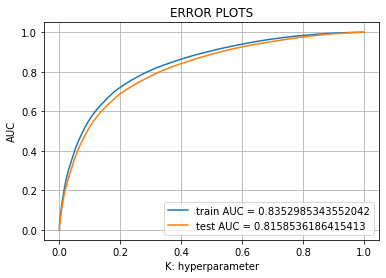

the maximum value of tpr*(1-fpr) 0.5790758065645032 for threshold 0.384
Model test F1 score is :  0.6874216550562028
Model test AUC score is :  0.8158536186415413


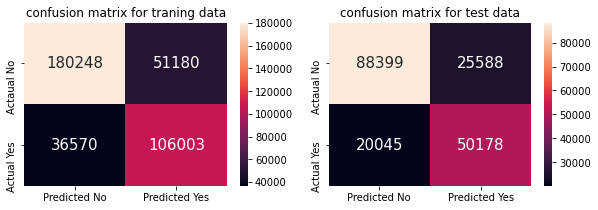

In [140]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train,X_test,y_train,y_test)

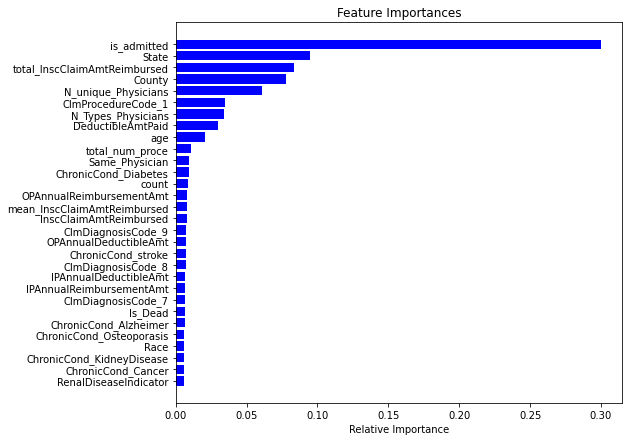

In [141]:
features = tr_data_final.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### plot model performence summary graph

In [75]:
def model_comp(label=[],metric1=[],metric2=[],set_ylabel='',set_title='',metric1_label='',metric2_label=''):
    
    x = np.arange(len(model))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(12,5))
    rects1 = ax.bar(x - width/2, metric1, width, label=metric1_label,color = 'teal')
    rects2 = ax.bar(x + width/2, metric2, width, label=metric2_label)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(set_ylabel)
    ax.set_title(set_title)
    ax.set_xticks(x)
    ax.set_xticklabels(model)
    ax.legend()
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    fig.tight_layout()

    plt.show()

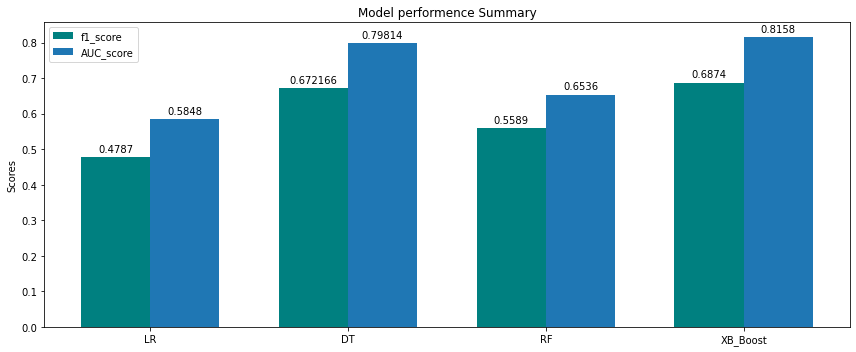

In [98]:
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.4787,0.672166,0.5589,0.6874]
AUC_score = [0.5848,0.79814,0.6536,0.8158]

model_comp(model,f1_score,AUC_score,'Scores','Model performence Summary','f1_score','AUC_score')

In [14]:
model_performence_df = pd.DataFrame()
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.4787,0.672166,0.5589,0.6874]
AUC_score = [0.5848,0.79814,0.6536,0.8158]

model_performence_df['Model']=model
model_performence_df['f1_score']=f1_score
model_performence_df['AUC_score']=AUC_score
model_performence_df

,Model,f1_score,AUC_score
0,LR,0.478700,0.58480
1,DT,0.672166,0.79814
2,RF,0.558900,0.65360
3,XB_Boost,0.687400,0.81580


# Model : using Important features

In [23]:
Important_col = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'is_admitted', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Is_Dead', 'age', 'Num_admit_days',
       'total_num_diag', 'total_num_proce','mean_InscClaimAmtReimbursed', 'total_InscClaimAmtReimbursed',
       'N_unique_Physicians', 'N_Types_Physicians', 'Same_Physician',
       'Same_Physician2']

print(len(Important_col))

34


In [26]:
X_train1 = X_train[Important_col]
X_train1.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,is_admitted,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,age,Num_admit_days,total_num_diag,total_num_proce,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
291034,0.000165,0.0,0,0,1,0,31,310,0,1,...,0.001592,0.0,1.0,0.0,0.000107,0.000098,0.002355,0.001939,0,0
469483,0.000165,0.0,0,0,1,0,37,250,0,0,...,0.001481,0.0,3.0,0.0,0.000162,0.000147,0.001178,0.000970,0,0
58448,0.000033,0.0,0,0,1,0,45,390,1,0,...,0.001459,0.0,1.0,0.0,0.000371,0.000406,0.001178,0.001939,1,0
403368,0.000012,0.0,0,1,2,0,37,540,1,0,...,0.000951,0.0,1.0,0.0,0.000045,0.000025,0.002355,0.001939,0,0
138503,0.000124,0.0,0,0,1,0,33,590,1,1,...,0.001592,0.0,9.0,2.0,0.000171,0.000528,0.002355,0.001939,0,0


In [28]:
X_test1 = X_test[Important_col]
X_test1.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,is_admitted,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,age,Num_admit_days,total_num_diag,total_num_proce,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
146519,0.000179,0.000000,0,0,1,0,47,110,0,0,...,0.002804,0.0,3.0,0.0,0.000241,0.000089,0.001679,0.001382,0,0
11321,0.000006,0.000000,0,0,1,0,31,270,1,1,...,0.002836,0.0,6.0,0.0,0.000134,0.000172,0.001679,0.001382,0,0
46577,0.000537,0.001639,0,1,2,0,34,910,0,0,...,0.002080,0.0,2.0,0.0,0.000170,0.000282,0.001679,0.001382,0,0
85539,0.000358,0.000000,0,1,2,0,23,620,1,0,...,0.002206,0.0,3.0,0.0,0.000465,0.000599,0.001679,0.002763,1,0
170928,0.000000,0.000000,0,1,2,0,42,220,0,1,...,0.001481,0.0,3.0,0.0,0.000061,0.000034,0.001679,0.001382,0,0


### Model 1: LR

In [27]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.6287630205060434


In [29]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train1,y_train)
print("score",logreg2.score(X_test1,y_test))

score 0.6284783670810488


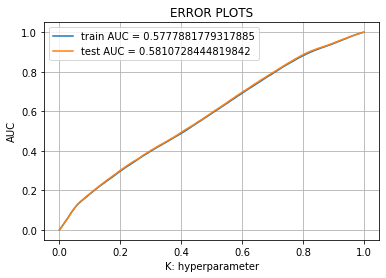

the maximum value of tpr*(1-fpr) 0.2961495310295378 for threshold 0.384
Model test F1 score is :  0.47969623457441196
Model test AUC score is :  0.5810728444819842


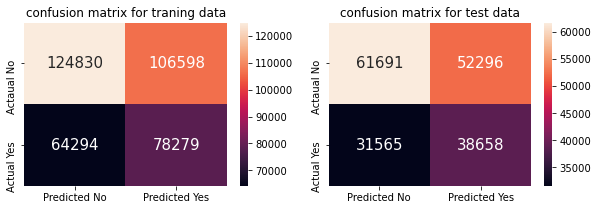

In [30]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train1,X_test1,y_train,y_test)

### Model 2: Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("roc_auc :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

tuned hpyerparameters :(best parameters)  {'max_depth': 50, 'min_samples_split': 270}
roc_auc : 0.8236731006596957


In [34]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 270)
DT_model2=DT_model2.fit(X_train1,y_train)

print("score",DT_model2.score(X_test1,y_test))

score 0.7370175343358124


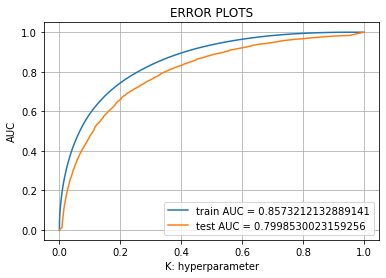

the maximum value of tpr*(1-fpr) 0.5966746888113615 for threshold 0.499
Model test F1 score is :  0.6747426369759929
Model test AUC score is :  0.7998530023159256


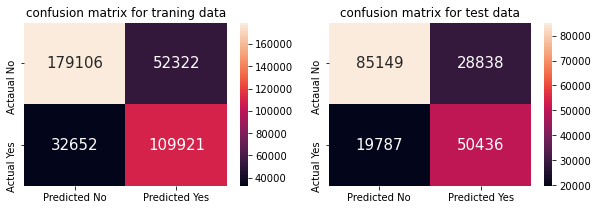

In [35]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train1,X_test1,y_train,y_test)

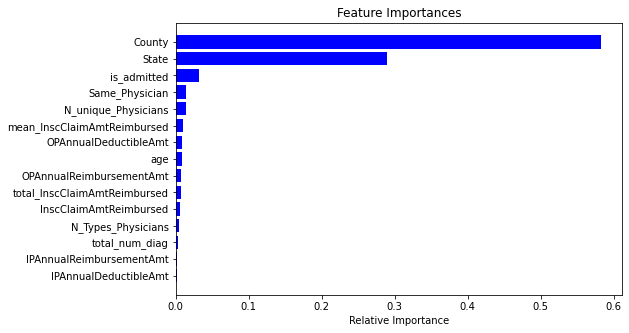

In [37]:
features = X_train1.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train1, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("roc_auc :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 59

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
roc_auc : 0.6593700027771942


In [39]:
RF2 = RandomForestClassifier(n_estimators = 500,max_features='auto',max_depth=8,criterion='entropy',
                             class_weight = 'balanced',n_jobs=-1,verbose=1, random_state=42)

RF2=RF2.fit(X_train1,y_train)

print("score",RF2.score(X_test1,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished


score 0.630763802182292


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished


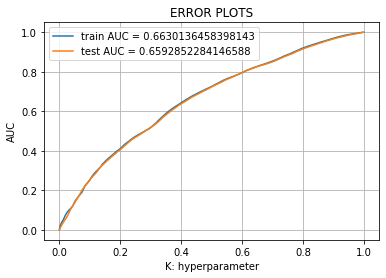

the maximum value of tpr*(1-fpr) 0.386483306322426 for threshold 0.482
Model test F1 score is :  0.5593699116790842
Model test AUC score is :  0.6592852284146588


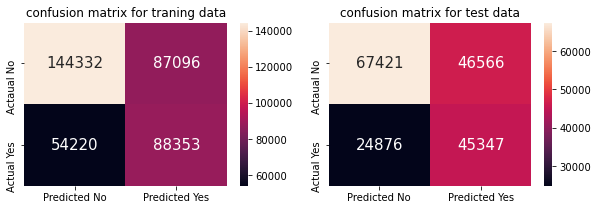

In [40]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train1,X_test1,y_train,y_test)

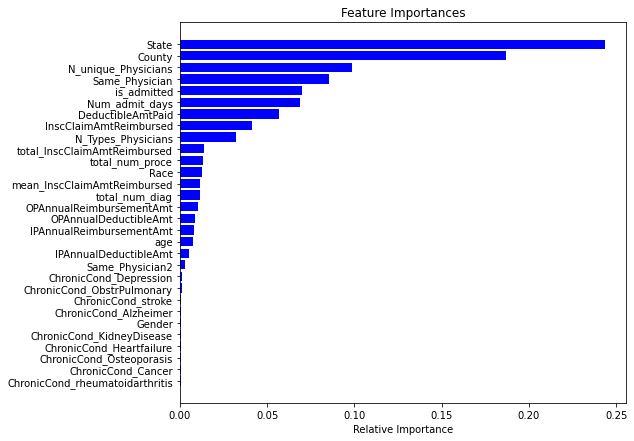

In [41]:
features = X_train1.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 4: XG_Boost

In [42]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='roc_auc', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.1min remaining:   53.5s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  4.5min remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished


tuned hpyerparameters :(best parameters)  {'n_estimators': 50, 'eta': 0.3}
roc_auc : 0.8068649348653624


In [43]:
XGB2 = xgb.XGBClassifier(eta=0.3,n_estimators=50,n_jobs=-1)

XGB2=XGB2.fit(X_train1,y_train)

print("score",XGB2.score(X_test1,y_test))

score 0.7526247217849193


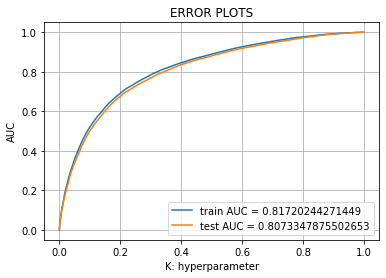

the maximum value of tpr*(1-fpr) 0.557914111860888 for threshold 0.398
Model test F1 score is :  0.6803471355800184
Model test AUC score is :  0.8073347875502653


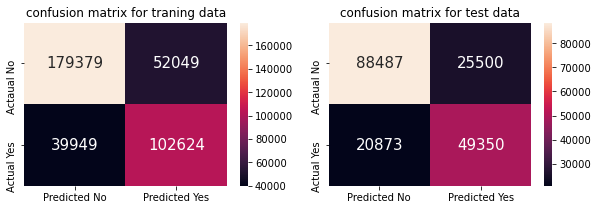

In [44]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train1,X_test1,y_train,y_test)

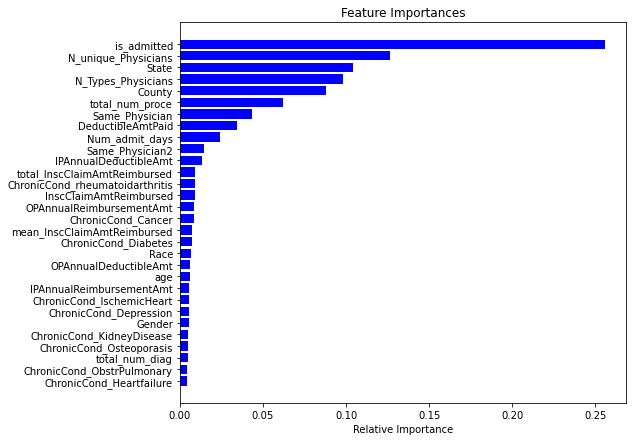

In [45]:
features = X_train1.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### plot model performence summary graph

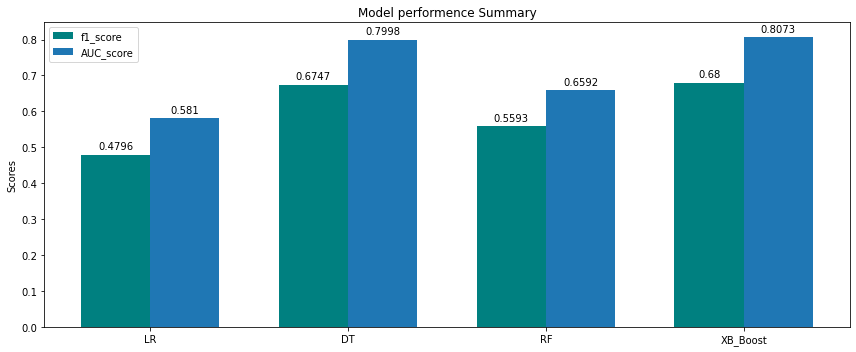

In [99]:
model_imp_fea = ['LR','DT','RF','XB_Boost']
f1_score_imp_fea = [0.4796,0.6747,0.5593,0.680]
AUC_score_imp_fea = [0.5810,0.7998,0.6592,0.8073]
model_comp(model,f1_score_imp_fea,AUC_score_imp_fea,'Scores','Model performence Summary','f1_score','AUC_score')

# Comparison using all features VS Imp features

In [92]:
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.4787,0.672166,0.5589,0.6874]
AUC_score = [0.5848,0.79814,0.6536,0.8158]

model_imp_fea = ['LR','DT','RF','XB_Boost']
f1_score_imp_fea = [0.4796,0.6747,0.5593,0.680]
AUC_score_imp_fea = [0.5810,0.7998,0.6592,0.8073]

model_performence_df = pd.DataFrame()

model_performence_df['Model'] = model
model_performence_df['f1_score'] = f1_score
model_performence_df['f1_score_imp_fea'] =f1_score_imp_fea
model_performence_df['AUC_score'] = AUC_score
model_performence_df['AUC_score_imp_fea'] = AUC_score_imp_fea

model_performence_df

,Model,f1_score,f1_score_imp_fea,AUC_score,AUC_score_imp_fea
0,LR,0.478700,0.4796,0.58480,0.5810
1,DT,0.672166,0.6747,0.79814,0.7998
2,RF,0.558900,0.5593,0.65360,0.6592
3,XB_Boost,0.687400,0.6800,0.81580,0.8073


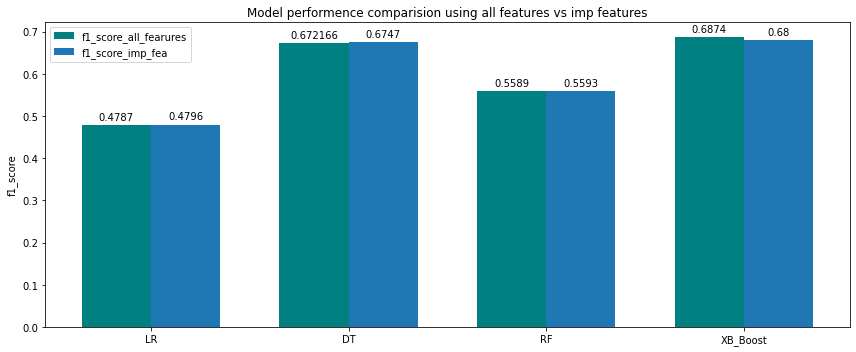

In [101]:
model_comp(model,f1_score,f1_score_imp_fea,'f1_score',
           'Model performence comparision using all features vs imp features',
          'f1_score_all_fearures','f1_score_imp_fea')

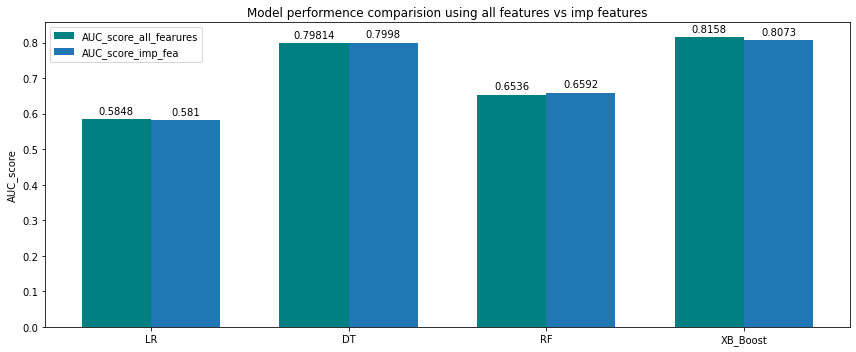

In [102]:
model_comp(model,AUC_score,AUC_score_imp_fea,'AUC_score','Model performence comparision using all features vs imp features',
          'AUC_score_all_fearures','AUC_score_imp_fea')

<h2>Conclusion</h2>
<ol>
<li>Not much diifernce in model performece using all fratures and selected Feaures</li>
<li>we observe a little better performence in some model if we use all features </li>


# Implementing Custom ensemble model

In [114]:
data = pd.read_csv("tr_data_final.csv")

print(data.shape)


col_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',\
                 'OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode','NoOfMonths_PartACov',\
                 'NoOfMonths_PartBCov','DiagnosisGroupCode','PotentialFraud']

data.drop(columns=col_to_remove, axis=1, inplace=True)
data['target']=data['target'].astype(int)

(558211, 75)


In [115]:
data.head(5)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,...,di_42731,total_num_diag,total_num_proce,count,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed,N_unique_Physicians,N_Types_Physicians,Same_Physician,Same_Physician2
0,PRV55912,26000,1068.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,0.0,3,12000.0,36000.0,1,1,0,0
1,PRV55907,5000,1068.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,3.0,1.0,3,12000.0,36000.0,1,2,1,0
2,PRV56046,5000,1068.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,6.0,0.0,3,12000.0,36000.0,2,2,0,0
3,PRV55912,50,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,9.0,0.0,3,3150.0,9450.0,2,2,0,0
4,PRV55905,9000,1068.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,3.0,1.0,3,3150.0,9450.0,1,2,1,0


In [116]:
from sklearn.model_selection import train_test_split

D_tr, D_te,  = train_test_split(data, test_size=0.2, random_state=42)

D_tr_provider_ID = D_tr['Provider'].values
D_tr.drop(columns='Provider', axis=1, inplace=True)

D_te_provider_ID = D_te['Provider'].values
D_te.drop(columns='Provider', axis=1, inplace=True)

print("Training D_tr : ",D_tr.shape)
print("Test D_te : ",D_te.shape)

#split D_tr into D1 and D2
D1, D2 = train_test_split(D_tr, test_size=0.5, random_state=42)

print("D1 : ",D1.shape)
print("D2 : ",D2.shape)

Training D_tr :  (446568, 62)
Test D_te :  (111643, 62)
D1 :  (223284, 62)
D2 :  (223284, 62)


In [117]:
from sklearn.preprocessing import Normalizer , StandardScaler

def num_col_normalizer(X_tr,X_te,col=''):
    """This function retruns normalised column for train and test data"""
    normalizer = Normalizer()
    
    normalizer.fit(X_tr[col].values.reshape(1,-1))
    
    tr = normalizer.transform(X_tr[col].values.reshape(1,-1)).reshape(-1,1)
    te = normalizer.transform(X_te[col].values.reshape(1,-1)).reshape(-1,1)
    
    return tr,te

#InscClaimAmtReimbursed
tr,te = num_col_normalizer(D1, D2,col='InscClaimAmtReimbursed')
tr1,te1 = num_col_normalizer(D1, D_te,col='InscClaimAmtReimbursed')
D1['InscClaimAmtReimbursed'] = tr
D2['InscClaimAmtReimbursed'] = te
D_te['InscClaimAmtReimbursed'] = te1

tr,te = num_col_normalizer(D1, D2,col='DeductibleAmtPaid')
tr1,te1 = num_col_normalizer(D1, D_te,col='DeductibleAmtPaid')
D1['DeductibleAmtPaid'] = tr
D2['DeductibleAmtPaid'] = te
D_te['DeductibleAmtPaid'] = te1


tr,te = num_col_normalizer(D1, D2,col='IPAnnualReimbursementAmt')
tr1,te1 = num_col_normalizer(D1, D_te,col='IPAnnualReimbursementAmt')
D1['IPAnnualReimbursementAmt'] = tr
D2['IPAnnualReimbursementAmt'] = te
D_te['IPAnnualReimbursementAmt'] = te1


tr,te = num_col_normalizer(D1, D2,col='IPAnnualDeductibleAmt')
tr1,te1 = num_col_normalizer(D1, D_te,col='IPAnnualDeductibleAmt')
D1['IPAnnualDeductibleAmt'] = tr
D2['IPAnnualDeductibleAmt'] = te
D_te['IPAnnualDeductibleAmt'] = te1


tr,te = num_col_normalizer(D1, D2,col='OPAnnualReimbursementAmt')
tr1,te1 = num_col_normalizer(D1, D_te,col='OPAnnualReimbursementAmt')
D1['OPAnnualReimbursementAmt'] = tr
D2['OPAnnualReimbursementAmt'] = te
D_te['OPAnnualReimbursementAmt'] = te1


tr,te = num_col_normalizer(D1, D2,col='OPAnnualDeductibleAmt')
tr1,te1 = num_col_normalizer(D1, D_te,col='OPAnnualDeductibleAmt')
D1['OPAnnualDeductibleAmt'] = tr
D2['OPAnnualDeductibleAmt'] = te
D_te['OPAnnualDeductibleAmt'] = te1


tr,te = num_col_normalizer(D1, D2,col='mean_InscClaimAmtReimbursed')
tr1,te1 = num_col_normalizer(D1, D_te,col='mean_InscClaimAmtReimbursed')
D1['mean_InscClaimAmtReimbursed'] = tr
D2['mean_InscClaimAmtReimbursed'] = te
D_te['mean_InscClaimAmtReimbursed'] = te1


tr,te = num_col_normalizer(D1, D2,col='total_InscClaimAmtReimbursed')
tr1,te1 = num_col_normalizer(D1, D_te,col='total_InscClaimAmtReimbursed')
D1['total_InscClaimAmtReimbursed'] = tr
D2['total_InscClaimAmtReimbursed'] = te
D_te['total_InscClaimAmtReimbursed'] = te1


tr,te = num_col_normalizer(D1, D2,col='age')
tr1,te1 = num_col_normalizer(D1, D_te,col='age')
D1['age'] = tr
D2['age'] = te
D_te['age'] = te1

        
tr,te = num_col_normalizer(D1, D2,col='Num_admit_days')
tr1,te1 = num_col_normalizer(D1, D_te,col='Num_admit_days')
D1['Num_admit_days'] = tr
D2['Num_admit_days'] = te
D_te['Num_admit_days'] = te1


tr,te = num_col_normalizer(D1, D2,col='N_unique_Physicians')
tr1,te1 = num_col_normalizer(D1, D_te,col='N_unique_Physicians')
D1['N_unique_Physicians'] = tr
D2['N_unique_Physicians'] = te
D_te['N_unique_Physicians'] = te1


tr,te = num_col_normalizer(D1, D2,col='N_Types_Physicians')
tr1,te1 = num_col_normalizer(D1, D_te,col='N_Types_Physicians')
D1['N_Types_Physicians'] = tr
D2['N_Types_Physicians'] = te
D_te['N_Types_Physicians'] = te1

### Function for Row and column sampling

In [118]:
def data_sampling_for_training_each_tree(X,y):
    selecting_rows=np.random.choice(X.shape[0],int(X.shape[0]*0.6),replace=False)
    selecting_rows = np.sort(selecting_rows)

    selecting_columns=np.random.choice(X.shape[1],np.random.randint(3,X.shape[1]),replace=False)#ensure min three columns
    selecting_columns = np.sort(selecting_columns)

    sampling_data = X[selecting_rows[:, None], selecting_columns]
    target_for_sampling_data = y[selecting_rows]

    #repeating rows using indices stored in Replacing_rows
    Replacing_rows=np.random.choice(selecting_rows,int(X.shape[0]*0.4)+1,replace=False)
    Replacing_rows = np.sort(Replacing_rows) 
    Replicated_sample_data = X[Replacing_rows[:, None], selecting_columns]
    target_for_replicated_data = y[Replacing_rows]

    #concatinating data 
    final_sample_data = np.vstack((sampling_data, Replicated_sample_data)) 
    final_target = np.vstack((target_for_sampling_data.reshape(-1,1), target_for_replicated_data.reshape(-1,1))) 
    
    return final_sample_data, final_target , selecting_rows, selecting_columns 

In [119]:
def data_samples(X,y):
    
    input_data_list = []
    target_list = []
    selected_rows = []
    selected_col = []   

    for i in range(0,k):
    
        final_sample_data, final_target , selecting_rows, selecting_columns = data_sampling_for_training_each_tree(X,y)
    
        input_data_list.append(final_sample_data)
        target_list.append(final_target)
        selected_rows.append(selecting_rows)
        selected_col.append(selecting_columns)
        
    return input_data_list , target_list, selected_rows , selected_col

### Tunning for k (number of samples)

In [120]:
from sklearn.tree import DecisionTreeClassifier
from tqdm.notebook import trange, tqdm

y = D1['target'].values
X = D1.drop('target', axis=1).values

#tunnning for k

param = [10,30,50,70]

for k in tqdm(param):
    
    input_data_list , target_list, selected_rows , selected_col = data_samples(X,y)
    model_list = []

    for i in range(0,k): 
    
        tree = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 270)
        tree = tree.fit(input_data_list[i],target_list[i])
        model_list.append(tree)
    
    D2_y = D2['target'].values
    D2_X=  D2.drop('target', axis=1).values
    
    #prepare training data
    Y_pred_val = []
    for i in range(0,k):
        y_pred = model_list[i].predict(D2_X[:,selected_col[i]])
        Y_pred_val.append(y_pred)
    
    data_to_train_meta_model = np.array(Y_pred_val).transpose()
    
    #prepare test data
    mm_test_y = D_te['target'].values
    mm_test_X= D_te.drop('target', axis=1).values
    
    pred_all_base_models = []
    
    for i in range(0,k):
        y_pred = model_list[i].predict(mm_test_X[:,selected_col[i]])#prediction from each model
        pred_all_base_models.append(y_pred)
        
    mm_test_final_X = np.array(pred_all_base_models).transpose()#(rows = n, col = 30)
    
    logreg2=LogisticRegression(C=0.001,penalty="l2")

    logreg2.fit(data_to_train_meta_model,D2_y)
    print("score with k = {} -->".format(k),logreg2.score(mm_test_final_X,mm_test_y))

score with k = 10 --> 0.7489139489264889
score with k = 30 --> 0.7628960167677329
score with k = 50 --> 0.767401449262381
score with k = 70 --> 0.7660937094130398



### Training DT on each samples

In [121]:
#taking  k = 70
from sklearn.tree import DecisionTreeClassifier
input_data_list , target_list, selected_rows , selected_col = data_samples(X,y)

model_list = []

for i in tqdm(range(0,70)): 
    
    tree = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 270)
    tree = tree.fit(input_data_list[i],target_list[i])
    
    model_list.append(tree)

In [123]:
import joblib
joblib.dump(model_list, 'model_list.pkl') 

['model_list.pkl']

###  Pass the D2 set to each of these k models,  get k predictions for D2, from each of the base models. Using these k predictions creates a new dataset, and for D2, train a meta model with these k predictions.

In [124]:
def get_meta_model_train_data(D2,k):
    '''This fun returns dataset to build meta model'''
    D2_y = D2['target'].values
    D2_X=  D2.drop('target', axis=1).values
    
    Y_pred_val = []
    for i in range(0,k):
        y_pred = model_list[i].predict(D2_X[:,selected_col[i]])
        Y_pred_val.append(y_pred)
    
    data_to_train_meta_model = np.array(Y_pred_val).transpose()
    
    return data_to_train_meta_model,D2_y

### Use 20% of data,pass it to each of the base model,get prediction and make a dataset from those predictions, pass this dataset to meta model and evaluate its performnece.


In [134]:
#notation : mm --> meta_model
def get_meta_model_test_data(mm_test_df,k):
    '''This fun returns dataset to check the performence the meta model'''

    mm_test_y = mm_test_df['target'].values
    mm_test_X= mm_test_df.drop('target', axis=1).values
    
    pred_all_base_models = []
    
    for i in range(0,k):
        y_pred = model_list[i].predict(mm_test_X[:,selected_col[i]])#prediction from each model
        pred_all_base_models.append(y_pred)
        
    mm_test_final_X = np.array(pred_all_base_models).transpose()#(rows = n, col = 30)
    
    return mm_test_final_X, mm_test_y

In [135]:
mm_x_train, mm_y_train = get_meta_model_train_data(D2,k=70)
print(mm_x_train.shape)
print(mm_y_train.shape)

(223284, 70)
(223284,)


In [136]:
mm_x_test, mm_y_test = get_meta_model_test_data(D_te,k=70)
print(mm_x_test.shape)
print(mm_y_test.shape)

(111643, 70)
(111643,)


## Tryinng different meta models

### meta model 1 : LR

In [137]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring='roc_auc', n_jobs=4, return_train_score=True , verbose = 10)
logreg_cv.fit(mm_x_train,mm_y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc_auc :",logreg_cv.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1775s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Batch computation too slow (2.1051s.) Setting batch_size=1.
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done  89 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done 117 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed:   39.2s
[Parallel(n_jobs=4)]: Done 14

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
roc_auc : 0.8173497743750986


In [138]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(mm_x_train,mm_y_train)
print("score",logreg2.score(mm_x_test,mm_y_test))

score 0.7639708714384242


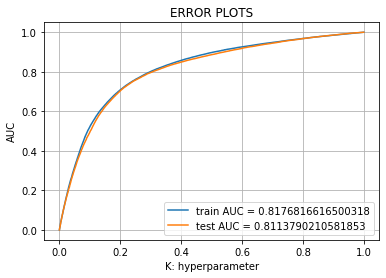

the maximum value of tpr*(1-fpr) 0.5718518530623772 for threshold 0.388
Model test F1 score is :  0.6998712370126987
Model test AUC score is :  0.8113790210581853


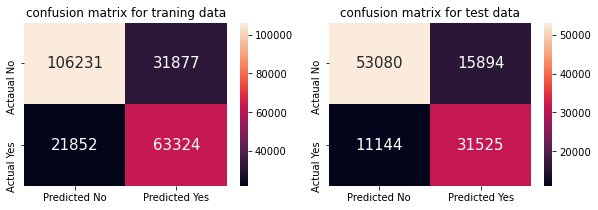

In [139]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,mm_x_train,mm_x_test,mm_y_train,mm_y_test)

In [140]:
joblib.dump(logreg2, 'mm_logiistic_regression.pkl') 

['mm_logiistic_regression.pkl']

### meta model 2 : DT

In [58]:
#DT
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(mm_x_train,mm_y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("roc_auc :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

tuned hpyerparameters :(best parameters)  {'max_depth': 500, 'min_samples_split': 500}
roc_auc : 0.8138360587091238


In [59]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 500, min_samples_split = 500)
DT_model2=DT_model2.fit(mm_x_train,mm_y_train)

print("score",DT_model2.score(mm_x_test,mm_y_test))

score 0.7506158021550836


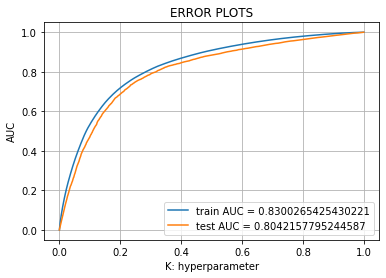

the maximum value of tpr*(1-fpr) 0.5796121382514473 for threshold 0.501
Model test F1 score is :  0.6955960815184117
Model test AUC score is :  0.8042157795244587


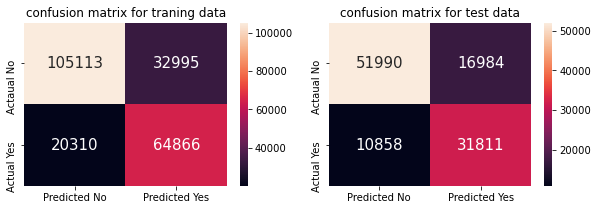

In [60]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,mm_x_train,mm_x_test,mm_y_train,mm_y_test)

In [72]:
joblib.dump(DT_model2, 'mm_Decision_Tree.pkl') 

['mm_Decision_Tree.pkl']

### meta model 3 : RF

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

parameters = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

RF_CV = RandomizedSearchCV(RF,parameters, cv= 5, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(mm_x_train,mm_y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("roc_auc :",RF_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 10.0min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 10.9min remaining:   41.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.0min finished


tuned hpyerparameters :(best parameters)  {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}
roc_auc : 0.8201687109546445


In [66]:
RF2 = RandomForestClassifier(n_estimators = 500,max_features='auto',max_depth=8,criterion='entropy',
                             class_weight = 'balanced',n_jobs=-1,verbose=1, random_state=42)

RF2=RF2.fit(mm_x_train,mm_y_train)

print("score",RF2.score(mm_x_test,mm_y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s


score 0.7610956351943248


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.1s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.1s finished


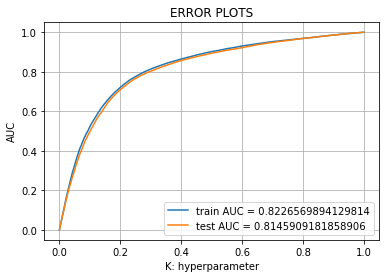

the maximum value of tpr*(1-fpr) 0.5832159599729462 for threshold 0.487
Model test F1 score is :  0.7053200469190208
Model test AUC score is :  0.8145909181858906


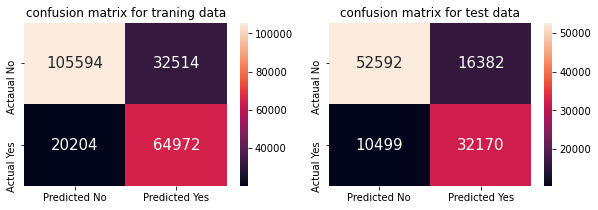

In [67]:
model_f1_score, model_AUC_score = model_performence_check(RF2,mm_x_train,mm_x_test,mm_y_train,mm_y_test)

In [73]:
joblib.dump(RF2, 'mm_Random_forest.pkl') 

['mm_Random_forest.pkl']

### meta model 4 : Xg_boost

In [68]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='roc_auc', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(mm_x_train,mm_y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.0min remaining:   53.2s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  4.6min remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished


tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'eta': 0.1}
roc_auc : 0.8207290421339405


In [69]:
XGB2 = xgb.XGBClassifier(eta=0.1,n_estimators=100,n_jobs=-1)

XGB2=XGB2.fit(mm_x_train,mm_y_train)

print("score",XGB2.score(mm_x_test,mm_y_test))

score 0.7653413111435557


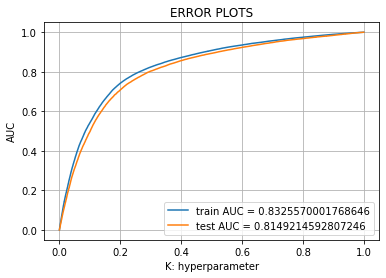

the maximum value of tpr*(1-fpr) 0.5959396720744863 for threshold 0.387
Model test F1 score is :  0.70361563590302
Model test AUC score is :  0.8149214592807246


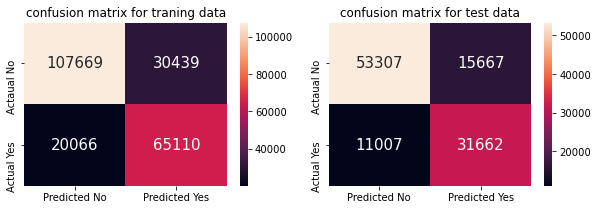

In [70]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,mm_x_train,mm_x_test,mm_y_train,mm_y_test)


In [74]:
joblib.dump(XGB2, 'mm_Xg_boost.pkl') 

['mm_Xg_boost.pkl']

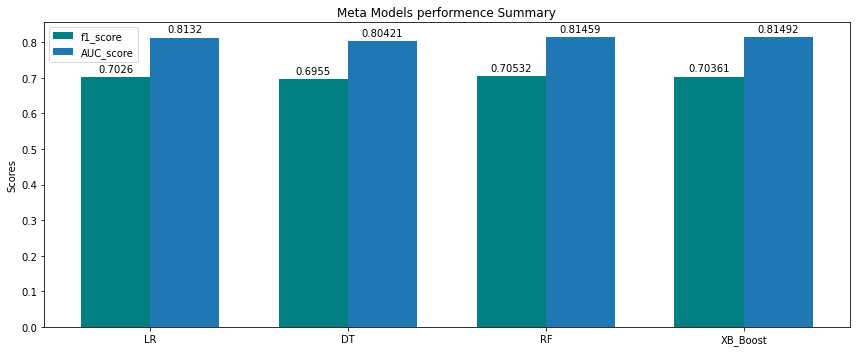

In [76]:
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.7026,0.6955,0.70532,0.70361]
AUC_score = [0.8132,0.80421,0.81459,0.81492]

model_comp(model,f1_score,AUC_score,'Scores','Meta Models performence Summary','f1_score','AUC_score')

<h2>Conclusion</h2>
<ol>
<li>Model performence of each of the meta models is approximately same</li>
<li>It would be wise to use simple linear classification model like logistic regression(F1_score =0.7032 || AUC_score = 0.8138)</li>


# Results

In [141]:
# Load the model from the file 
mm_LR = joblib.load('mm_logiistic_regression.pkl')
y_yred = mm_LR.predict(mm_x_test)

In [142]:
prediction_df = pd.DataFrame()
prediction_df['Provider_ID'] = D_te_provider_ID
prediction_df['prediction'] = y_yred
prediction_df['true_target'] = mm_y_test


In [147]:
prediction_df.head(10)

,Provider_ID,prediction,true_target
0,PRV57173,1,1
1,PRV57287,0,0
2,PRV57526,0,0
3,PRV55004,1,1
4,PRV54635,0,0
5,PRV55510,0,0
6,PRV56008,1,1
7,PRV55907,0,0
8,PRV56990,0,0
9,PRV54690,0,0


In [148]:
prediction_df.tail(10)

,Provider_ID,prediction,true_target
111633,PRV51584,0,1
111634,PRV52590,1,1
111635,PRV54739,1,1
111636,PRV56748,0,1
111637,PRV55566,1,0
111638,PRV56447,0,1
111639,PRV53928,0,0
111640,PRV52041,1,1
111641,PRV56228,0,0
111642,PRV55234,0,0


In [145]:
prediction_df.to_csv('Final_output.csv')